<a href="https://colab.research.google.com/github/mnarasani/PersonalLoan/blob/main/AIML_ML_Project_full_code_notebook_Murali_Narasani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns


import scipy.stats as stats
from sklearn import metrics, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score, recall_score, f1_score)

import warnings
warnings.filterwarnings("ignore")  # ignore warnings

%matplotlib inline
sns.set()

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Code to read the data from csv (inout) data file
df=pd.read_csv('/content/drive/MyDrive/MachineLearning/PersonalLoan/Loan_Modelling.csv')

## Data Overview

In [ ]:
pd.concat([df.head(10), df.tail(10)])

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4   1.60          1   
1        2   45          19      34    90089       3   1.50          1   
2        3   39          15      11    94720       1   1.00          1   
3        4   35           9     100    94112       1   2.70          2   
4        5   35           8      45    91330       4   1.00          2   
5        6   37          13      29    92121       4   0.40          2   
6        7   53          27      72    91711       2   1.50          2   
7        8   50          24      22    93943       1   0.30          3   
8        9   35          10      81    90089       3   0.60          2   
9       10   34           9     180    93023       1   8.90          3   
4990  4991   55          25      58    95023       4   2.00          3   
4991  4992   51          25      92    91330       1   1.90          2   
4992  4993   30           5      13    90037       4   0.50          3   
4993  4994   45          21     218    91801       2   6.67          1   
4994  4995   64          40      75    94588       3   2.00          3   
4995  4996   29           3      40    92697       1   1.90          3   
4996  4997   30           4      15    92037       4   0.40          1   
4997  4998   63          39      24    93023       2   0.30          3   
4998  4999   65          40      49    90034       3   0.50          2   
4999  5000   28           4      83    92612       3   0.80          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
5          155              0                   0           0       1   
6            0              0                   0           0       1   
7            0              0                   0           0       0   
8          104              0                   0           0       1   
9            0              1                   0           0       0   
4990       219              0                   0           0       0   
4991       100              0                   0           0       0   
4992         0              0                   0           0       0   
4993         0              0                   0           0       1   
4994         0              0                   0           0       1   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
5              0  
6              0  
7              1  
8              0  
9              0  
4990           1  
4991           1  
4992           0  
4993           0  
4994           0  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace("creditcard", "credit_card")
df.columns

Index(['id', 'age', 'experience', 'income', 'zipcode', 'family', 'ccavg',
       'education', 'mortgage', 'personal_loan', 'securities_account',
       'cd_account', 'online', 'credit_card'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   experience          5000 non-null   int64  
 3   income              5000 non-null   int64  
 4   zipcode             5000 non-null   int64  
 5   family              5000 non-null   int64  
 6   ccavg               5000 non-null   float64
 7   education           5000 non-null   int64  
 8   mortgage            5000 non-null   int64  
 9   personal_loan       5000 non-null   int64  
 10  securities_account  5000 non-null   int64  
 11  cd_account          5000 non-null   int64  
 12  online              5000 non-null   int64  
 13  credit_card         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations:**

*   All column names are lowercase
*   There are 5000 observations in this dataset.
*   All values are of a numerical type (int, float).
*   There are zero missing values in all columns. We will confirm.

**Check for duplicates**

In [ ]:
df[df.duplicated()].count()

id                    0
age                   0
experience            0
income                0
zipcode               0
family                0
ccavg                 0
education             0
mortgage              0
personal_loan         0
securities_account    0
cd_account            0
online                0
credit_card           0
dtype: int64

**Describe dataset**

In [ ]:
df.nunique()

id                    5000
age                     45
experience              47
income                 162
zipcode                467
family                   4
ccavg                  108
education                3
mortgage               347
personal_loan            2
securities_account       2
cd_account               2
online                   2
credit_card              2
dtype: int64

**Observations:**

*   id has 5000 unique values. We can drop this column.
*   We can change family, education to categorical.

In [ ]:
df.drop(['id'], axis=1, inplace=True)
df.head()

age  experience  income  zipcode  family  ccavg  education  mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   personal_loan  securities_account  cd_account  online  credit_card  
0              0                   1           0       0            0  
1              0                   1           0       0            0  
2              0                   0           0       0            0  
3              0                   0           0       0            0  
4              0                   0           0       0            1

**Change dtypes**

In [ ]:
cat_features = ['family', 'education']

for feature in cat_features:
    df[feature] = pd.Categorical(df[feature])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 5000 non-null   int64   
 1   experience          5000 non-null   int64   
 2   income              5000 non-null   int64   
 3   zipcode             5000 non-null   int64   
 4   family              5000 non-null   category
 5   ccavg               5000 non-null   float64 
 6   education           5000 non-null   category
 7   mortgage            5000 non-null   int64   
 8   personal_loan       5000 non-null   int64   
 9   securities_account  5000 non-null   int64   
 10  cd_account          5000 non-null   int64   
 11  online              5000 non-null   int64   
 12  credit_card         5000 non-null   int64   
dtypes: category(2), float64(1), int64(10)
memory usage: 439.9 KB


In [ ]:
df.describe(include='all').T

count  unique  top    freq          mean          std  \
age                 5000.0     NaN  NaN     NaN     45.338400    11.463166   
experience          5000.0     NaN  NaN     NaN     20.104600    11.467954   
income              5000.0     NaN  NaN     NaN     73.774200    46.033729   
zipcode             5000.0     NaN  NaN     NaN  93169.257000  1759.455086   
family              5000.0     4.0  1.0  1472.0           NaN          NaN   
ccavg               5000.0     NaN  NaN     NaN      1.937938     1.747659   
education           5000.0     3.0  1.0  2096.0           NaN          NaN   
mortgage            5000.0     NaN  NaN     NaN     56.498800   101.713802   
personal_loan       5000.0     NaN  NaN     NaN      0.096000     0.294621   
securities_account  5000.0     NaN  NaN     NaN      0.104400     0.305809   
cd_account          5000.0     NaN  NaN     NaN      0.060400     0.238250   
online              5000.0     NaN  NaN     NaN      0.596800     0.490589   
credit_card         5000.0     NaN  NaN     NaN      0.294000     0.455637   

                        min      25%      50%      75%      max  
age                    23.0     35.0     45.0     55.0     67.0  
experience             -3.0     10.0     20.0     30.0     43.0  
income                  8.0     39.0     64.0     98.0    224.0  
zipcode             90005.0  91911.0  93437.0  94608.0  96651.0  
family                  NaN      NaN      NaN      NaN      NaN  
ccavg                   0.0      0.7      1.5      2.5     10.0  
education               NaN      NaN      NaN      NaN      NaN  
mortgage                0.0      0.0      0.0    101.0    635.0  
personal_loan           0.0      0.0      0.0      0.0      1.0  
securities_account      0.0      0.0      0.0      0.0      1.0  
cd_account              0.0      0.0      0.0      0.0      1.0  
online                  0.0      0.0      1.0      1.0      1.0  
credit_card             0.0      0.0      0.0      1.0      1.0

**Observations:**

*   All columns have a count of 5000, meaning there are zero missing values in these columns.
*   There are 4 unique values in family and 3 unique values in the education column.
*   There are only 2 unique values in the personal_loan, securities_account, cd_account, online and credit_card columns.
*   age has a mean of 45 and a standard deviation of about 11.4. The min age is 23 and the max is 67.
*   experience has a mean of 20 and a standard deviation of 11.5. The min is -3 and the max is 43 years. We will inspect the negative value further.
*   income has a mean of 74K and a standard deviation of 46K. The values range from 8K to 224K.
*   ccavg has a mean of 1.93 and a standard deviation of 1.7. The values range from 0.0 to 10.0.
*   mortgage has a mean of 56.5K and a standard deviation of 101K. The standard deviation is greater than the mean. We will investigate further.
*   There are zero values in the mortgage column. We will inspect.

In [ ]:
df.isnull().sum().sort_values(ascending=False)

age                   0
experience            0
income                0
zipcode               0
family                0
ccavg                 0
education             0
mortgage              0
personal_loan         0
securities_account    0
cd_account            0
online                0
credit_card           0
dtype: int64

In [ ]:
df.isnull().values.any() # If there are any null values in data set

False

**Observations:**

*   Confirming dtype changed to categorical variables for the columns mentioned previously.
*   Confirming there are zero missing values. Not to be confused with values that are zero. We have alot of those in the mortgage column. Also, we will investigate the outliers.

In [ ]:
numerical_feature_df = df.select_dtypes(include=['int64','float64'])
numerical_feature_df.skew()

age                  -0.029341
experience           -0.026325
income                0.841339
zipcode              -0.296165
ccavg                 1.598443
mortgage              2.104002
personal_loan         2.743607
securities_account    2.588268
cd_account            3.691714
online               -0.394785
credit_card           0.904589
dtype: float64

**Observations:**

*   income, ccavg and mortgage are heavily skewed. We will investigate further.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

   1.   **The distribution of mortgage is heavily right-skewed. The majority of the values are concentrated on the left side of the graph.**
   2.   **There are 3462 rows where mortgage equals to ZERO!**
   3.   **mortgage column has many outliers to the upside.**
   4.   **There are fewer occurrences as the values increase, forming a long tail that stretches to the right.**

2. How many customers have credit cards?
   
      1.   **There are 1470 customers who have credit card**
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
  1.   **income, ccavg and cd_account attributes have a string correlation with the personal loan attribute**

4. How does a customer's interest in purchasing a loan vary with their age?

  1.   **There is no real coorelation betwee the age and the customer's interest in personal loan**

5. How does a customer's interest in purchasing a loan vary with their education?
      1.  **The customers with an education of '2' (Graduate) and '3'(Advanced/Professional) hold a greater percentage of personal loans than those customer with an education of '1'(Undergrad).**

### Univariate Analysis

In [ ]:
def histogram_boxplot(feature, figsize=(15, 7), bins=None):
    """
    Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15,10))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots

    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='yellow') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='blue', linestyle='-');# Add median to the histogram

In [ ]:
def create_outliers(feature: str, data=df):
    """
    Returns dataframe object of feature outliers.
    feature: 1-d feature array
    data: pandas dataframe (default is df)
    """
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    #print(((df.Mileage < (Q1 - 1.5 * IQR)) | (df.Mileage > (Q3 + 1.5 * IQR))).sum())
    return data[((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))]

**Observations on age**

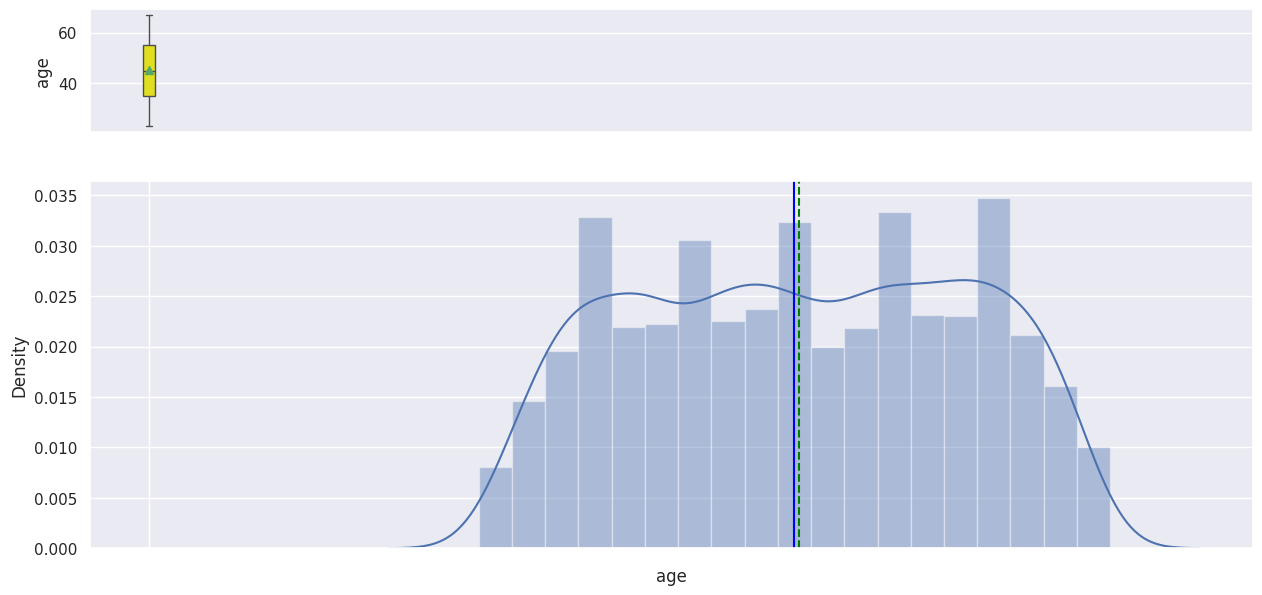

In [ ]:
histogram_boxplot(df.age)

**Observations**

No outliers in the age column. The mean is near the median.

Average age is about 45 years old.

The age column distribution is uniform.


**Observations on income**

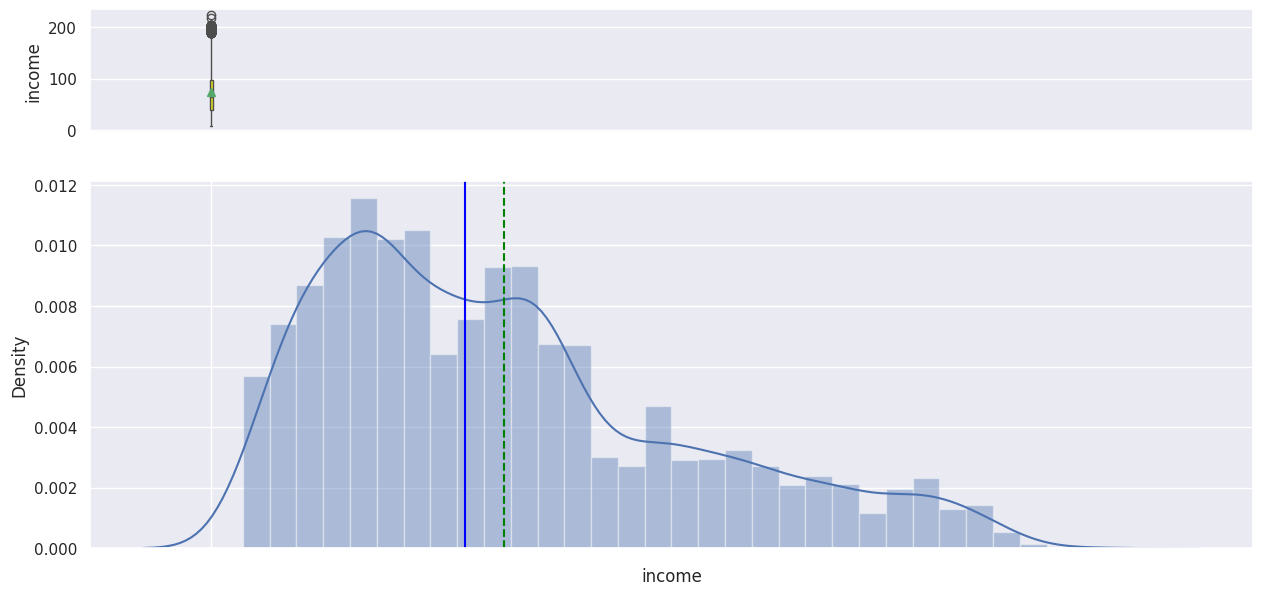

In [ ]:
histogram_boxplot(df.income)

**Observations**


The average income is about 60K, with a median value of about 70K.

income column is right skewed and has many outliers to the upside.

**Observations on income outliers**

In [ ]:
outliers = create_outliers('income')
outliers.sort_values(by='income', ascending=False).head(20)

age  experience  income  zipcode family  ccavg education  mortgage  \
3896   48          24     224    93940      2   6.67         1         0   
4993   45          21     218    91801      2   6.67         1         0   
526    26           2     205    93106      1   6.33         1       271   
2988   46          21     205    95762      2   8.80         1       181   
4225   43          18     204    91902      2   8.80         1         0   
677    46          21     204    92780      2   2.80         1         0   
2278   30           4     204    91107      2   4.50         1         0   
3804   47          22     203    95842      2   8.80         1         0   
2101   35           5     203    95032      1  10.00         3         0   
787    45          15     202    91380      3  10.00         3         0   
3608   59          35     202    94025      1   4.70         1       553   
4895   45          20     201    92120      2   2.80         1         0   
2337   43          16     201    95054      1  10.00         2         0   
2447   44          19     201    95819      2   8.80         1         0   
1901   43          19     201    94305      2   6.67         1         0   
1711   27           3     201    95819      1   6.33         1       158   
1716   32           8     200    91330      2   6.50         1       565   
459    35          10     200    91107      2   3.00         1       458   
917    45          20     200    90405      2   8.80         1         0   
4659   28           4     199    92121      1   6.33         1         0   

      personal_loan  securities_account  cd_account  online  credit_card  
3896              0                   0           1       1            1  
4993              0                   0           0       1            0  
526               0                   0           0       0            1  
2988              0                   1           0       1            0  
4225              0                   0           0       1            0  
677               0                   0           0       1            0  
2278              0                   0           0       1            0  
3804              0                   0           0       1            0  
2101              1                   0           0       0            0  
787               1                   0           0       0            0  
3608              0                   0           0       0            0  
4895              0                   0           0       1            1  
2337              1                   0           0       0            1  
2447              0                   0           0       1            1  
1901              0                   1           0       1            0  
1711              0                   0           0       1            0  
1716              0                   0           0       1            0  
459               0                   0           0       0            0  
917               0                   0           0       1            1  
4659              0                   0           0       0            0

In [ ]:
print(f"There are {outliers.shape[0]} outliers.")

There are 96 outliers.


**Observations on ccavg**

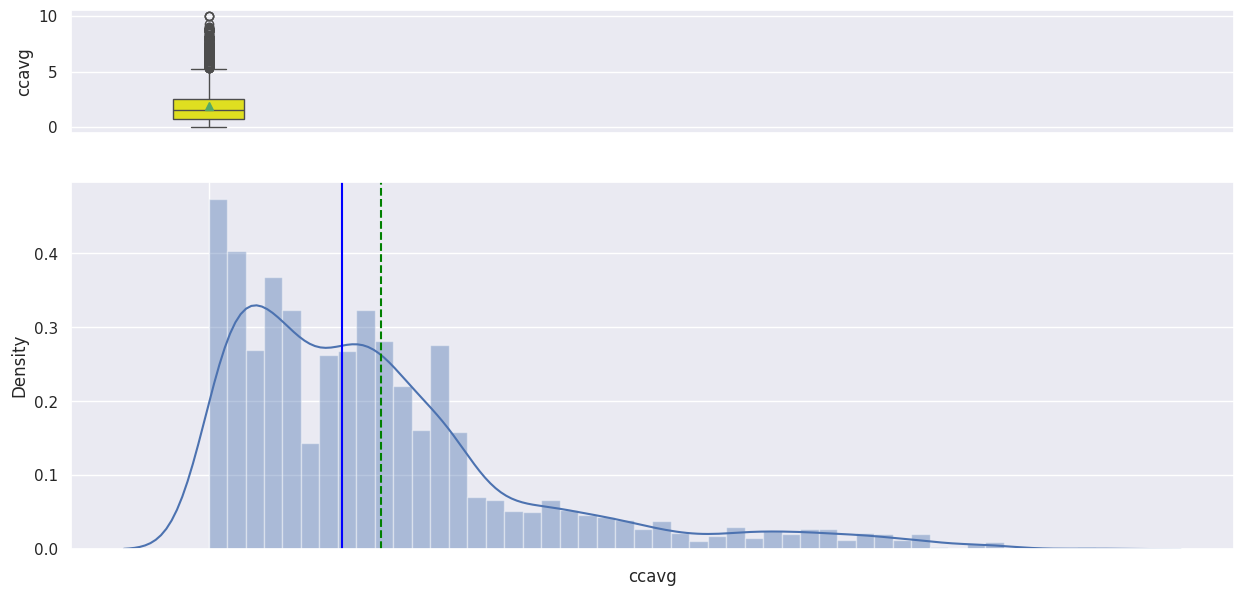

In [ ]:
histogram_boxplot(df.ccavg)

**Observations**


ccavg has an average of about 1.5 and a median of about 2.

ccavg column is right skewed and has many outliers to the upside.

**Observations on ccavg outliers**

In [ ]:
outliers = create_outliers('ccavg')
outliers.sort_values(by='ccavg', ascending=False).head(20)

age  experience  income  zipcode family  ccavg education  mortgage  \
2337   43          16     201    95054      1   10.0         2         0   
787    45          15     202    91380      3   10.0         3         0   
2101   35           5     203    95032      1   10.0         3         0   
3943   61          36     188    91360      1    9.3         2         0   
3822   63          33     178    91768      4    9.0         3         0   
1339   52          25     180    94545      2    9.0         2       297   
9      34           9     180    93023      1    8.9         3         0   
1277   45          20     194    92110      2    8.8         1       428   
3312   47          22     190    94550      2    8.8         1         0   
4225   43          18     204    91902      2    8.8         1         0   
2988   46          21     205    95762      2    8.8         1       181   
2447   44          19     201    95819      2    8.8         1         0   
881    44          19     154    92116      2    8.8         1         0   
917    45          20     200    90405      2    8.8         1         0   
2769   33           9     183    91320      2    8.8         3       582   
3804   47          22     203    95842      2    8.8         1         0   
1797   35          10     143    91365      1    8.6         1         0   
4156   37          12     193    92780      1    8.6         1         0   
614    37          12     180    90034      1    8.6         1         0   
4603   37          12     179    91768      1    8.6         1         0   

      personal_loan  securities_account  cd_account  online  credit_card  
2337              1                   0           0       0            1  
787               1                   0           0       0            0  
2101              1                   0           0       0            0  
3943              1                   0           0       0            0  
3822              1                   0           0       0            0  
1339              1                   0           0       1            0  
9                 1                   0           0       0            0  
1277              0                   0           0       0            0  
3312              0                   0           0       0            0  
4225              0                   0           0       1            0  
2988              0                   1           0       1            0  
2447              0                   0           0       1            1  
881               0                   0           0       1            0  
917               0                   0           0       1            1  
2769              1                   0           0       1            0  
3804              0                   0           0       1            0  
1797              0                   0           0       1            1  
4156              0                   0           0       0            0  
614               0                   0           0       1            1  
4603              0                   0           0       1            0

In [ ]:
print(f"There are {outliers.shape[0]} outliers.")

There are 324 outliers.


**Observations on mortgage**

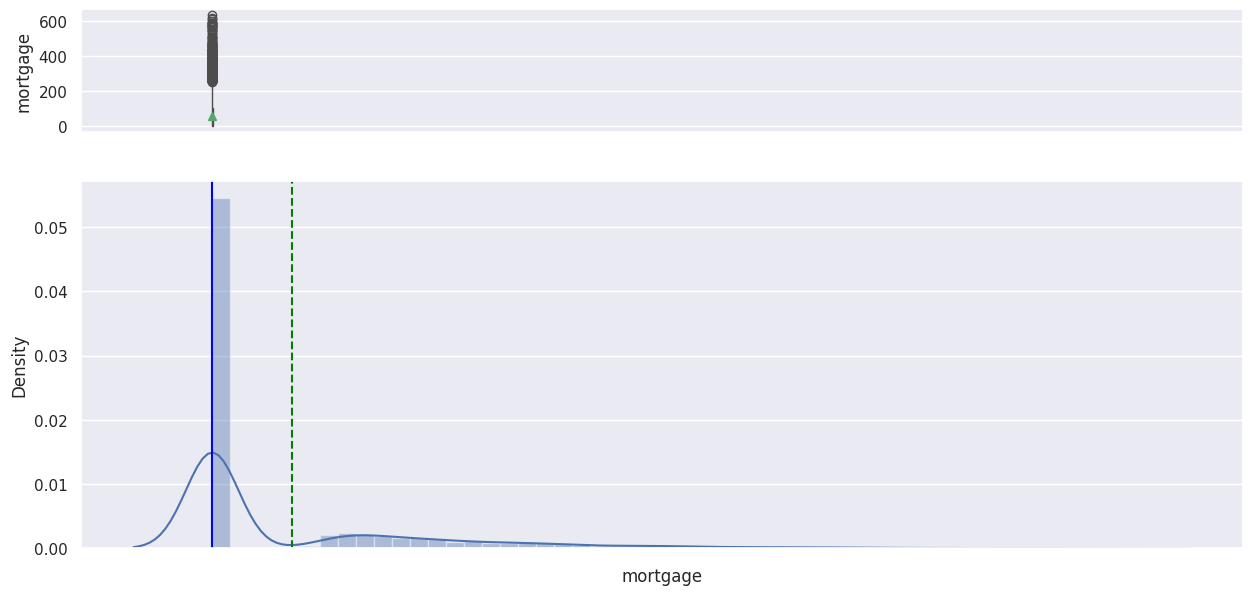

In [ ]:
histogram_boxplot(df.mortgage)

**Observations**

mortgage has many values that aren't null but are equal to zero. We will dissect further.

mortgage column has many outliers to the upside.

**Observations on mortgage outliers**

In [ ]:
outliers = create_outliers('mortgage')
outliers.sort_values(by='mortgage', ascending=False)

age  experience  income  zipcode family  ccavg education  mortgage  \
2934   37          13     195    91763      2    6.5         1       635   
303    49          25     195    95605      4    3.0         1       617   
4812   29           4     184    92126      4    2.2         3       612   
1783   53          27     192    94720      1    1.7         1       601   
4842   49          23     174    95449      3    4.6         2       590   
...   ...         ...     ...      ...    ...    ...       ...       ...   
1522   25          -1     101    94720      4    2.3         3       256   
3950   38          14      62    94143      1    1.5         3       255   
2159   61          35      99    94085      1    4.8         3       255   
3138   36          11     103    93555      1    4.6         1       255   
3948   37          12     123    94304      4    3.1         2       253   

      personal_loan  securities_account  cd_account  online  credit_card  
2934              0                   0           0       1            0  
303               1                   0           0       0            0  
4812              1                   0           0       1            0  
1783              0                   0           0       1            0  
4842              1                   0           0       0            0  
...             ...                 ...         ...     ...          ...  
1522              0                   0           0       0            1  
3950              0                   0           0       1            0  
2159              1                   0           0       0            1  
3138              0                   0           0       1            0  
3948              1                   0           1       1            1  

[291 rows x 13 columns]

In [ ]:
print(f"There are {outliers.shape[0]} outliers in the outlier column.")

There are 291 outliers in the outlier column.


**Check zero values in mortgage column**

In [ ]:
print(f'There are {df[df.mortgage==0].shape[0]} rows where mortgage equals to ZERO!')

There are 3462 rows where mortgage equals to ZERO!


**Check zipcodes frequency where mortgage equals zero.**

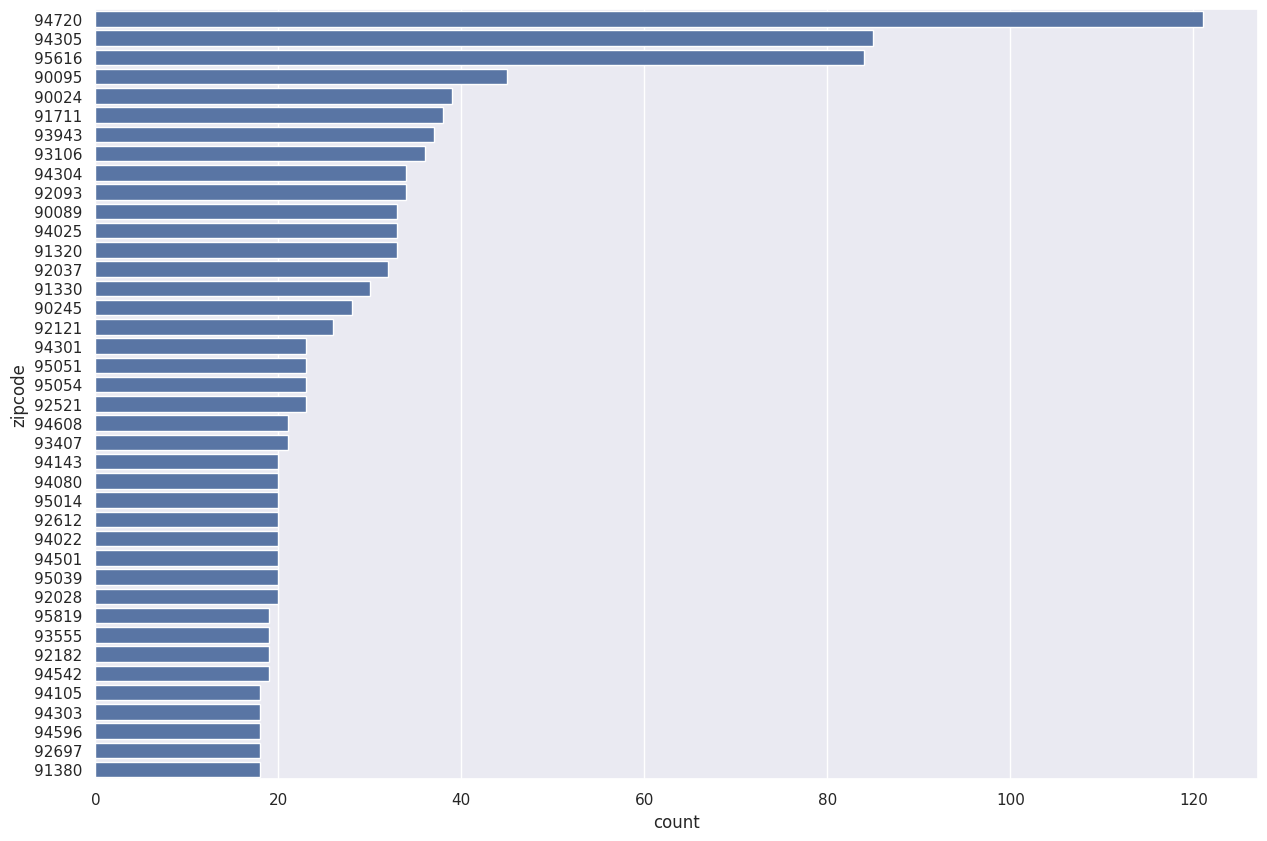

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(y=df[df.mortgage==0]['zipcode'],
              data=df,
              order=df[df.mortgage==0]['zipcode'].value_counts().index[:40]);

**Observations**

The zipcode 94720 has the most frequent number of mortgages that equal zero with over 120 values.

The second highest number of zero values is 94305, and the third highest is 95616.


**Observations on experience**

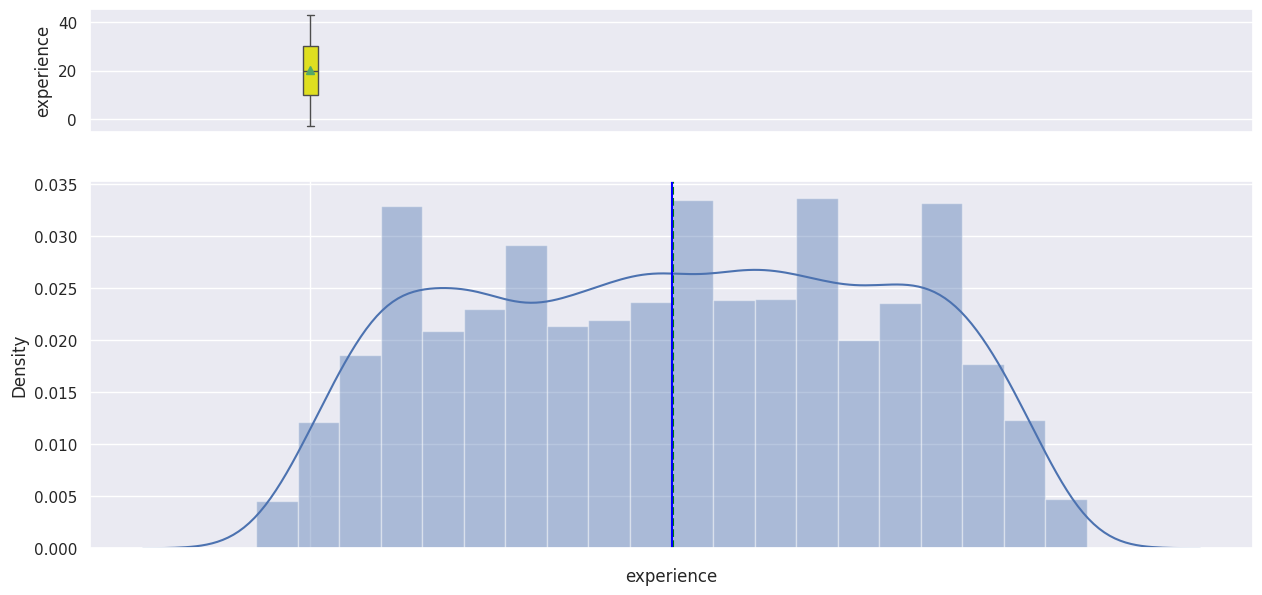

In [ ]:
histogram_boxplot(df.experience)


**Observations**

The experience column is uniform and has no outliers.

The average and median experience is about 20 years.

experience column is uniformly distributed. The mean is close to the median.


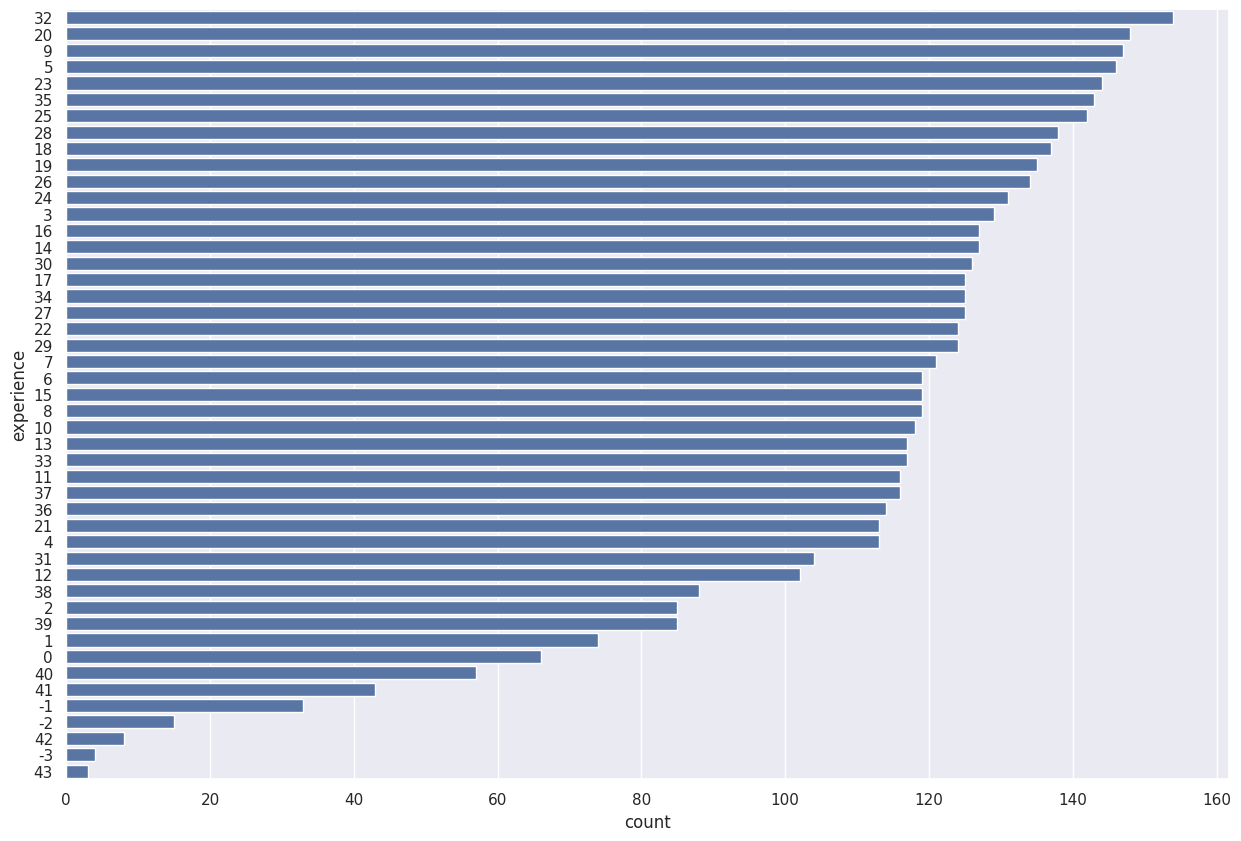

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(y=df.experience,
              data=df,
              order=df.experience.value_counts().index[:]);

**Observations**

32 years is the greatest number of experience years observed with about 150 observations.

The plot shows negative values.


In [ ]:
print(f"There are {df[df.experience<0].shape[0]} rows that have professional experience less than zero.")
df[df.experience<0].sort_values(by='experience', ascending=True).head()

There are 52 rows that have professional experience less than zero.


age  experience  income  zipcode family  ccavg education  mortgage  \
4514   24          -3      41    91768      4    1.0         3         0   
2618   23          -3      55    92704      3    2.4         2       145   
4285   23          -3     149    93555      2    7.2         1         0   
3626   24          -3      28    90089      4    1.0         3         0   
2717   23          -2      45    95422      4    0.6         2         0   

      personal_loan  securities_account  cd_account  online  credit_card  
4514              0                   0           0       1            0  
2618              0                   0           0       1            0  
4285              0                   0           0       1            0  
3626              0                   0           0       0            0  
2717              0                   0           0       1            1

**Countplot for experience less than zero vs. age.**

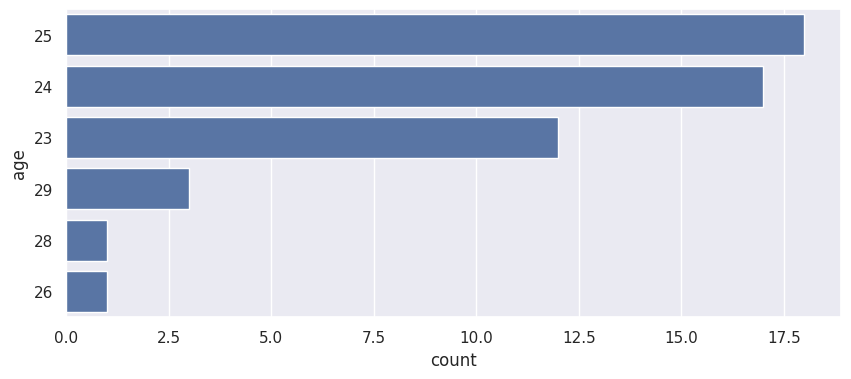

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(y=df[df.experience<0]['age'],
              data=df,
              order=df[df.experience<0]['age'].value_counts().index[:]);

**Observations**

Most of the negative values are from the 25 year old age group with over 17.

This is a error in the data entry. You can't have negative years of experience so we will take the absolute value of the experience.


**Taking absolute values of the experience column**



In [ ]:
df['abs_experience'] = np.abs(df.experience)
df.sort_values(by='experience', ascending=True).head(10)

age  experience  income  zipcode family  ccavg education  mortgage  \
4514   24          -3      41    91768      4    1.0         3         0   
2618   23          -3      55    92704      3    2.4         2       145   
4285   23          -3     149    93555      2    7.2         1         0   
3626   24          -3      28    90089      4    1.0         3         0   
3796   24          -2      50    94920      3    2.4         2         0   
2717   23          -2      45    95422      4    0.6         2         0   
4481   25          -2      35    95045      4    1.0         3         0   
3887   24          -2     118    92634      2    7.2         1         0   
2876   24          -2      80    91107      2    1.6         3       238   
2962   23          -2      81    91711      2    1.8         2         0   

      personal_loan  securities_account  cd_account  online  credit_card  \
4514              0                   0           0       1            0   
2618              0                   0           0       1            0   
4285              0                   0           0       1            0   
3626              0                   0           0       0            0   
3796              0                   1           0       0            0   
2717              0                   0           0       1            1   
4481              0                   0           0       1            0   
3887              0                   1           0       1            0   
2876              0                   0           0       0            0   
2962              0                   0           0       0            0   

      abs_experience  
4514               3  
2618               3  
4285               3  
3626               3  
3796               2  
2717               2  
4481               2  
3887               2  
2876               2  
2962               2

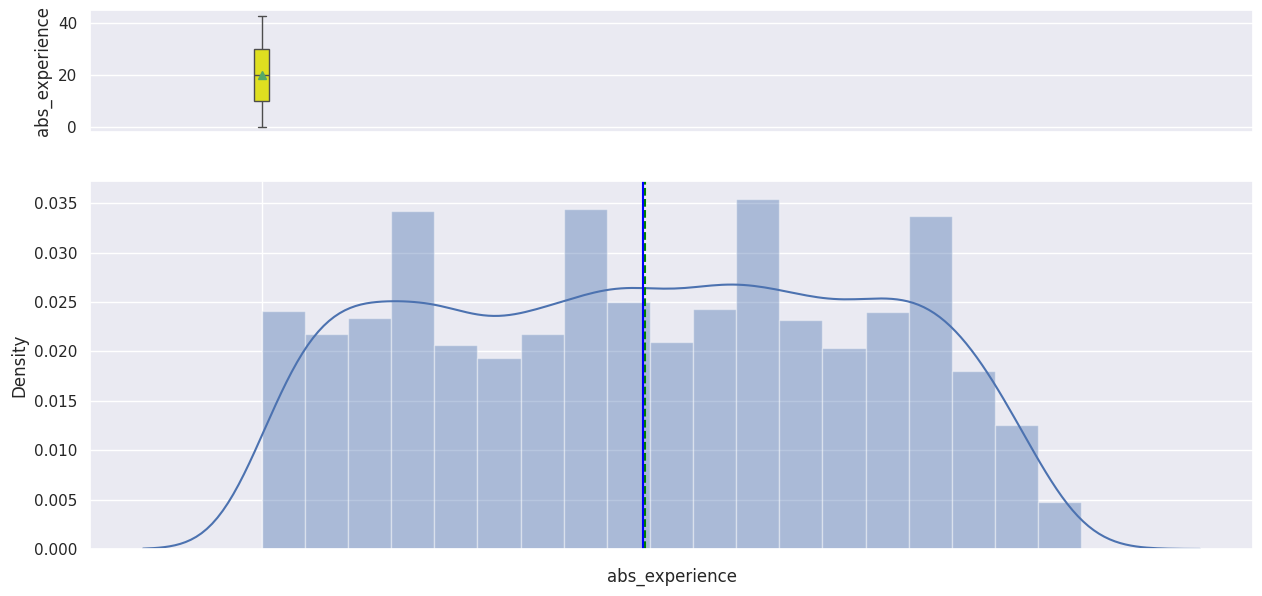

In [ ]:
histogram_boxplot(df.abs_experience)

**Observations**

It didn't change the distribution that much.


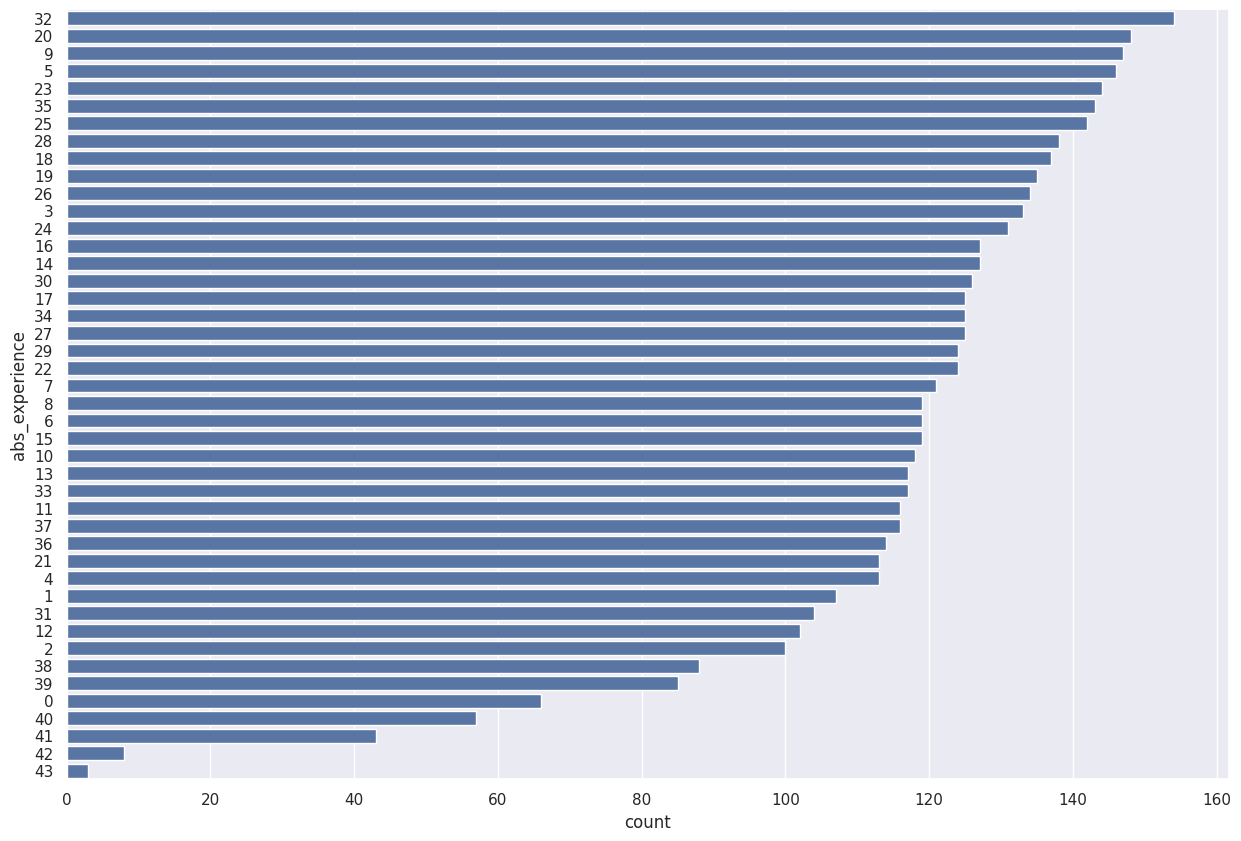

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(y=df.abs_experience,
              data=df,
              order=df.abs_experience.value_counts().index[:]);


*   There are no more negative experience values.

**Overview on distributions of numerical columns.**

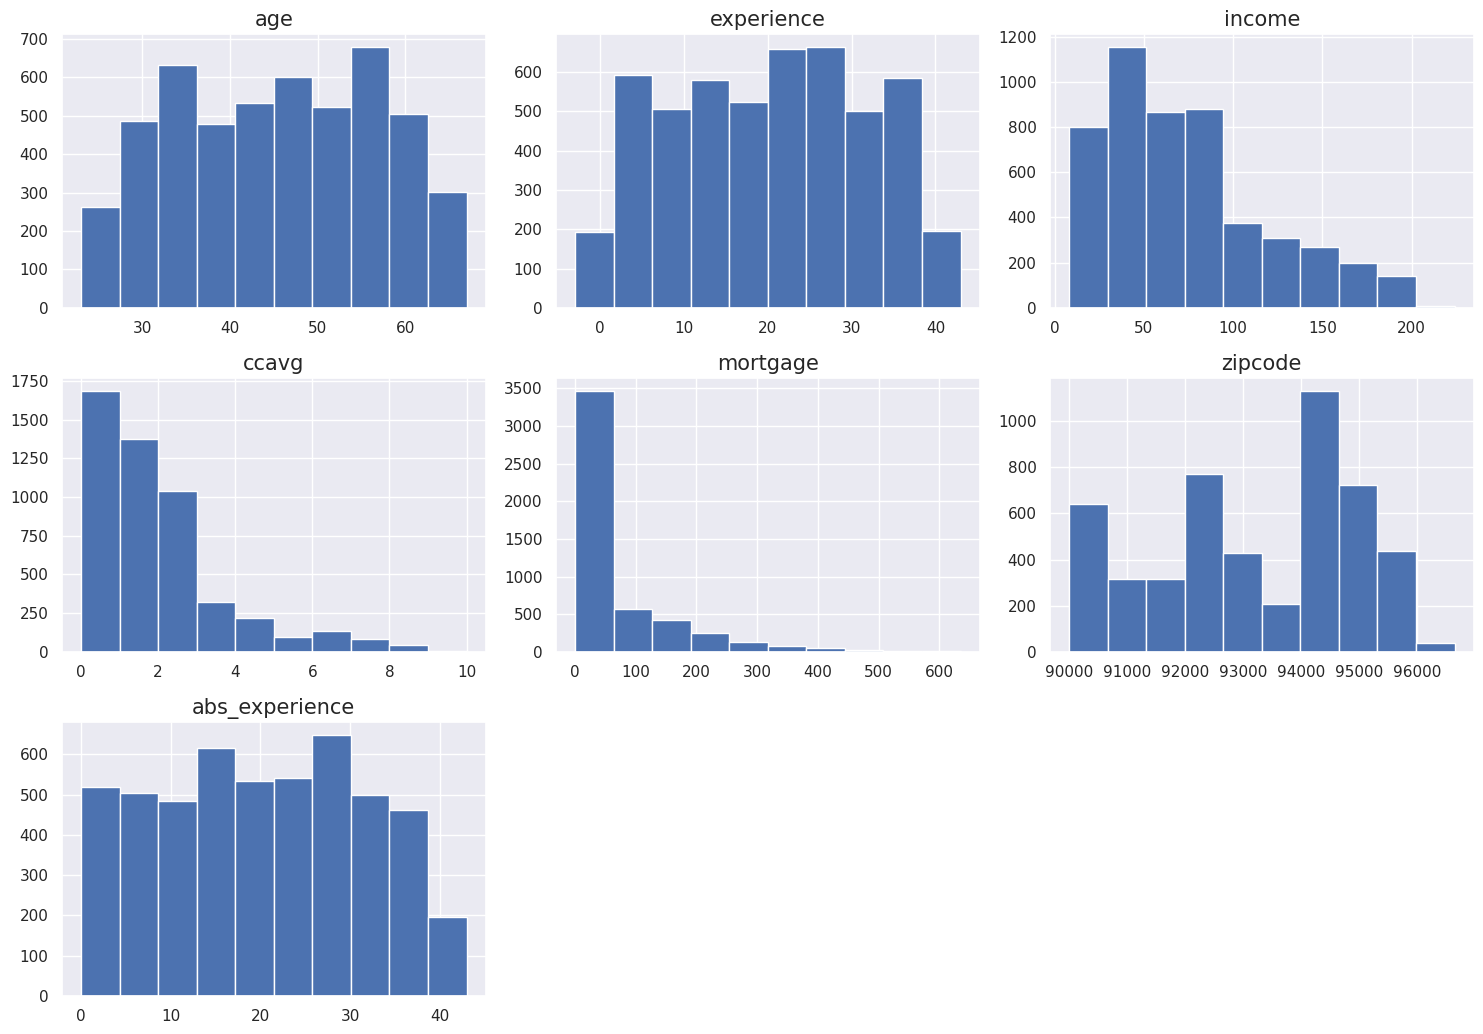

In [ ]:
# lets plot histogram of all plots
features = ['age', 'experience', 'income',
            'ccavg', 'mortgage', 'zipcode',
            'abs_experience']

n_rows = math.ceil(len(features)/3)
plt.figure(figsize=(15, n_rows*3.5))
for i, feature in enumerate(list(features)):
    plt.subplot(n_rows, 3, i+1)
    plt.hist(df[feature])
    plt.tight_layout()
    plt.title(feature, fontsize=15);

**Overview on the dispersion of numerical columns.**

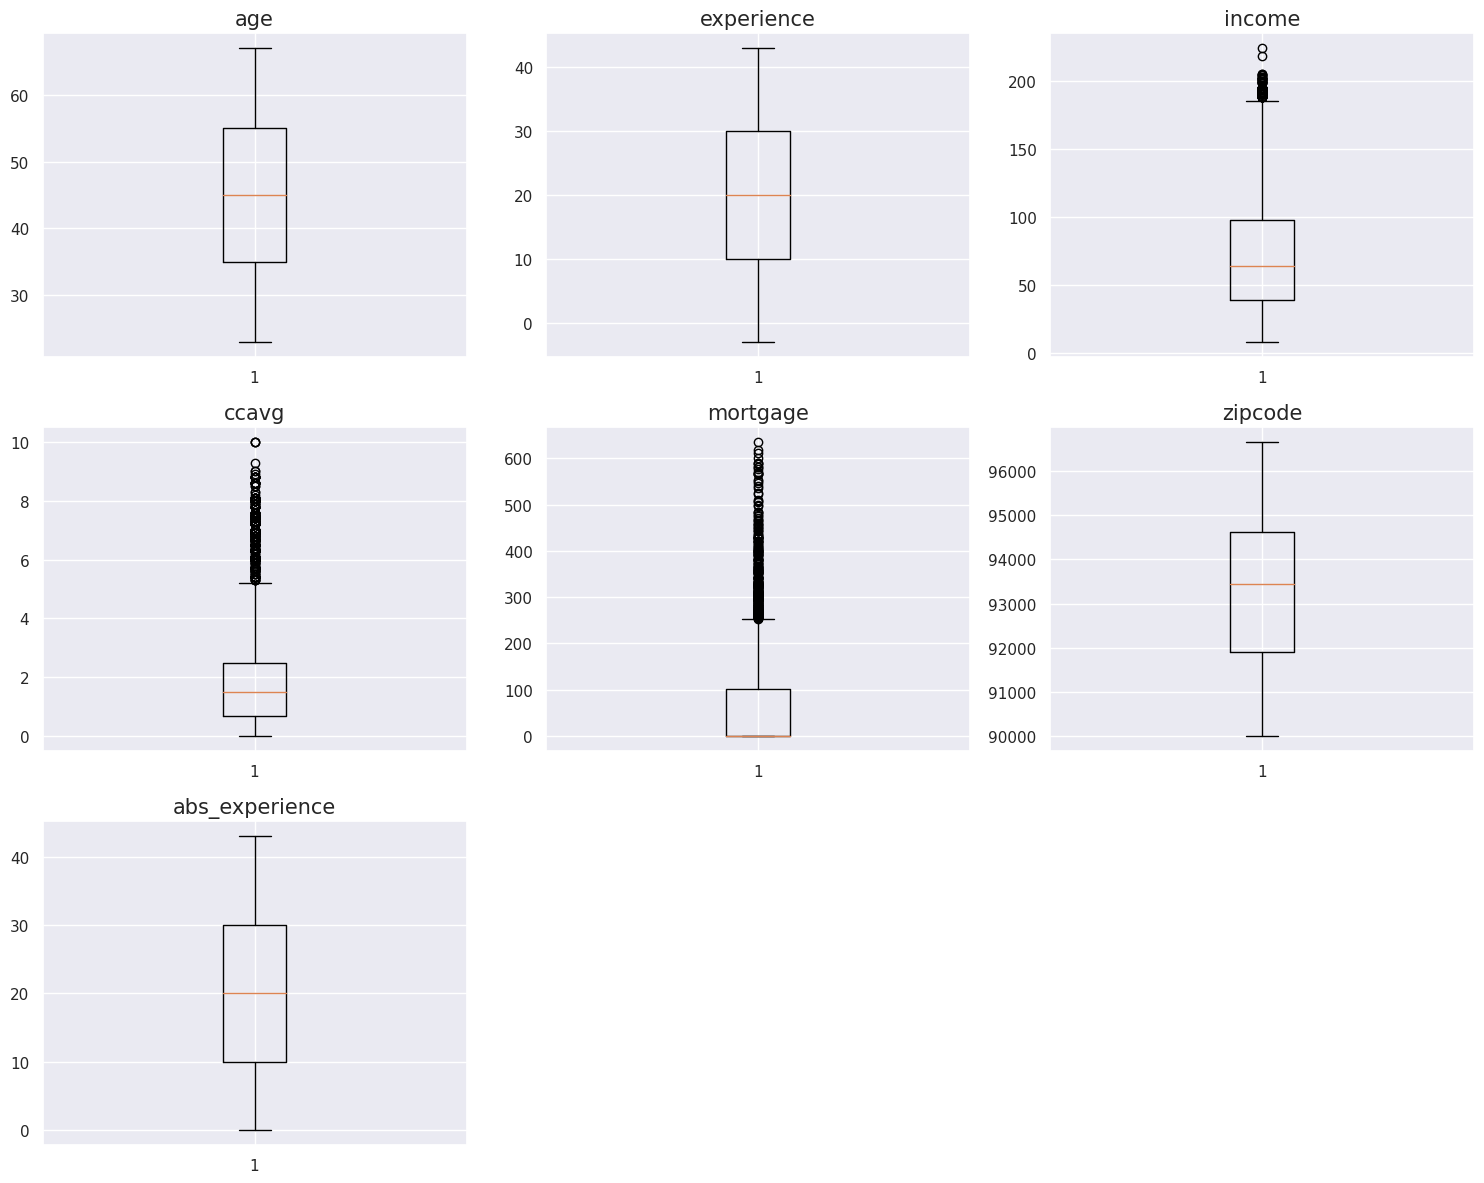

In [ ]:
# outlier detection using boxplot
plt.figure(figsize=(15, n_rows*4))
for i, feature in enumerate(features):
    plt.subplot(n_rows, 3, i+1)
    plt.boxplot(df[feature], whis=1.5)
    plt.tight_layout()
    plt.title(feature, fontsize=15);

**Display value counts from categorical columns.**

In [ ]:
# looking at value counts for non-numeric features
num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes=='category'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(f"Column: {colname}")
    print("="*40)
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("\n") # just for more space between

Column: family
family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64


Column: education
education
1    2096
3    1501
2    1403
Name: count, dtype: int64




**Observations on zipcode.**

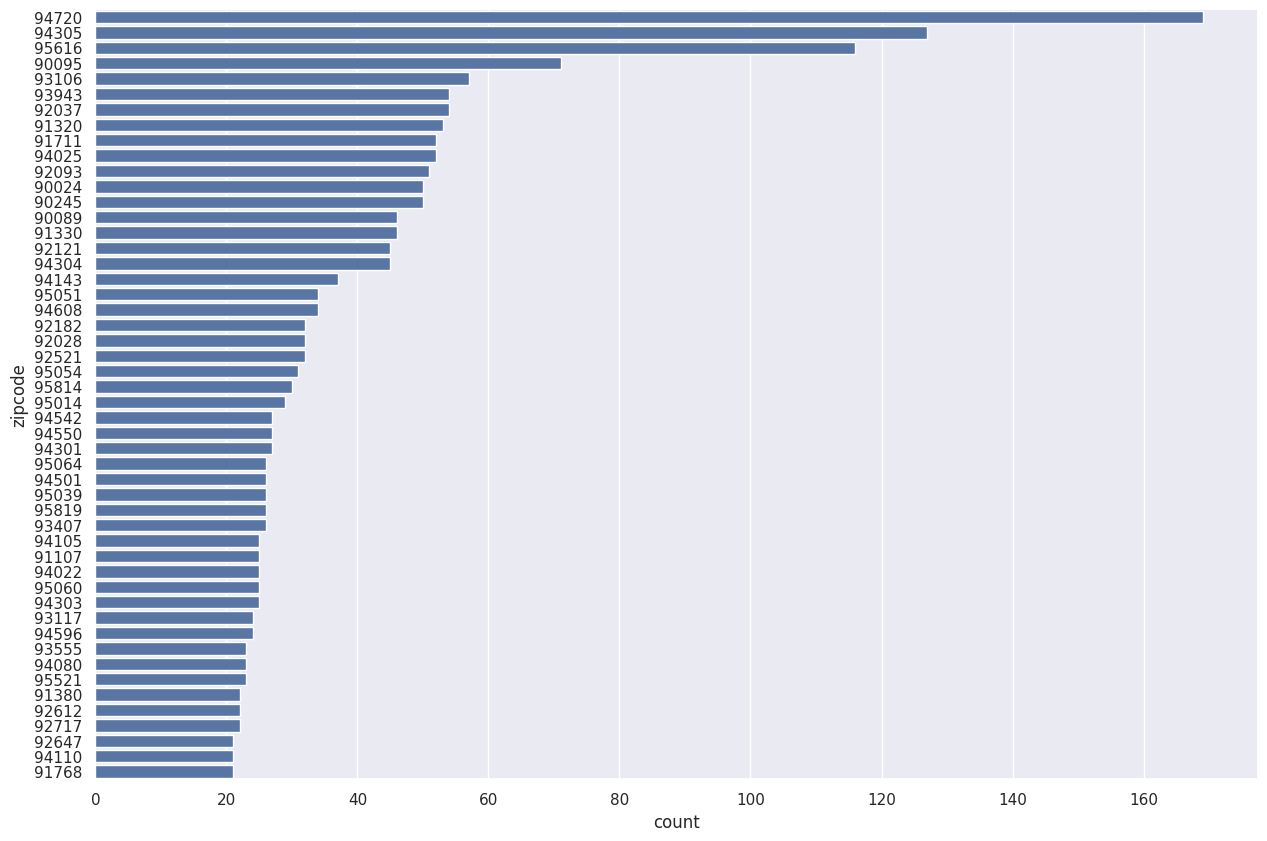

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(y="zipcode", data=df, order=df.zipcode.value_counts().index[0:50]);

**Observations**

*   Most of the values come from the zipcode 94720 with over 160.

In [ ]:
def perc_on_bar(plot, feature):
    """
    Shows the percentage on the top of bar in plot.
    feature: categorical feature
    The function won't work if a column is passed in hue parameter
    """
    total = len(feature) # length of the column
    for p in ax.patches:
        # percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        # percentage = 100 * p.get_height()/total
        percentage = 100 * p.get_width()/total
        percentage_label = f"{percentage:.1f}%"
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage_label, (x, y), size = 12) # annotate the percantage
    plt.show() # show the plot

**Observations on family.**

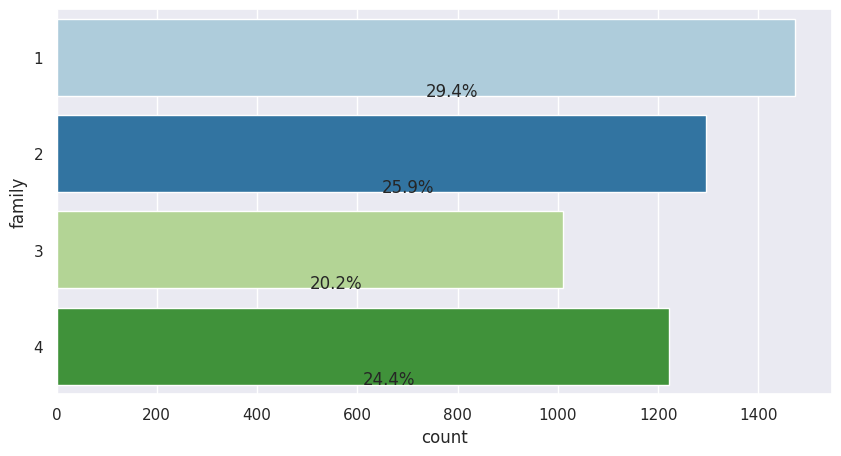

In [ ]:
#perc_on_bar('family')
plt.figure(figsize=(10, 5))
ax = sns.countplot(df.family, palette='Paired')
perc_on_bar(ax,df.family)

**Observations**

*   The largest category of the family column is 1 with a percentage of 29.4%.

*   The second largest category of the family column is a size of 2, then 4. A size of 3 is the smallest portion in our dataset.

**Observations on education.**

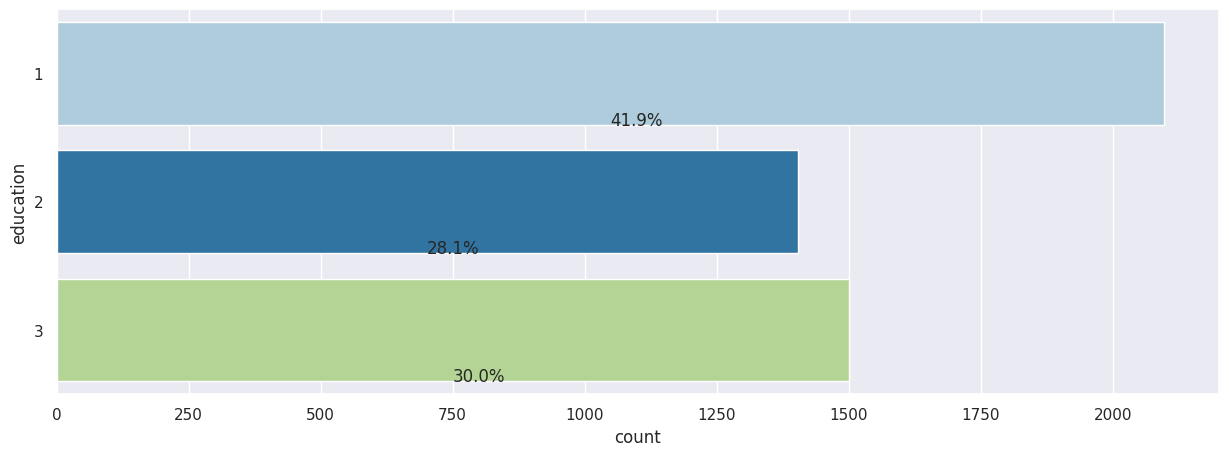

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(df.education, palette='Paired')
perc_on_bar(ax, df.education)

**Observations**

*   The education column has 3 categories.
*   Category 1 (undergrad) hold the greatest proportion with 41.9%.
*  Category 3 holds the second highest with 30%.
*  Category 2 holds the third highest proportion with 28.1%.








In [ ]:
def perc_on_bar_v(plot, feature):
    """
    Shows the percentage on the top of bar in plot.
    feature: categorical feature
    The function won't work if a column is passed in hue parameter
    """
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = 100 * p.get_height()/total # percentage of each class of the category
        percentage_label = f"{percentage:.1f}%"
        #x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()           # hieght of the plot
        if percentage > 0:
           ax.annotate(percentage_label, (x, y), size = 12) # annotate the percantage
    plt.show() # show the plot

**Oberservations on personal_loan.**

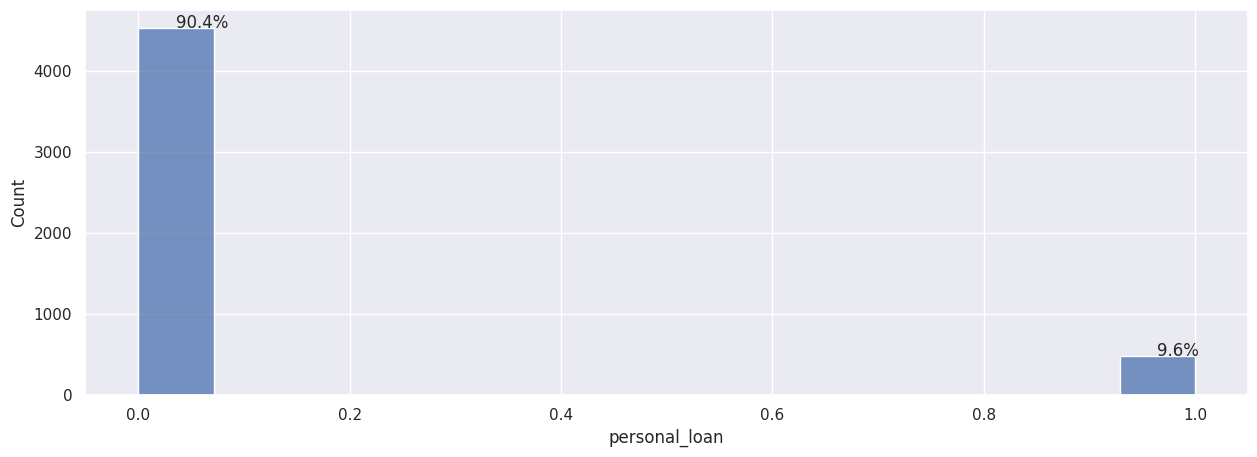

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(df.personal_loan);
perc_on_bar_v(ax, df.personal_loan)

**Observations**

*   Those that didn't accept a personal_loan from the last campaign make up the greatest percentage with 90.4%.




**Observations on securities_account.**

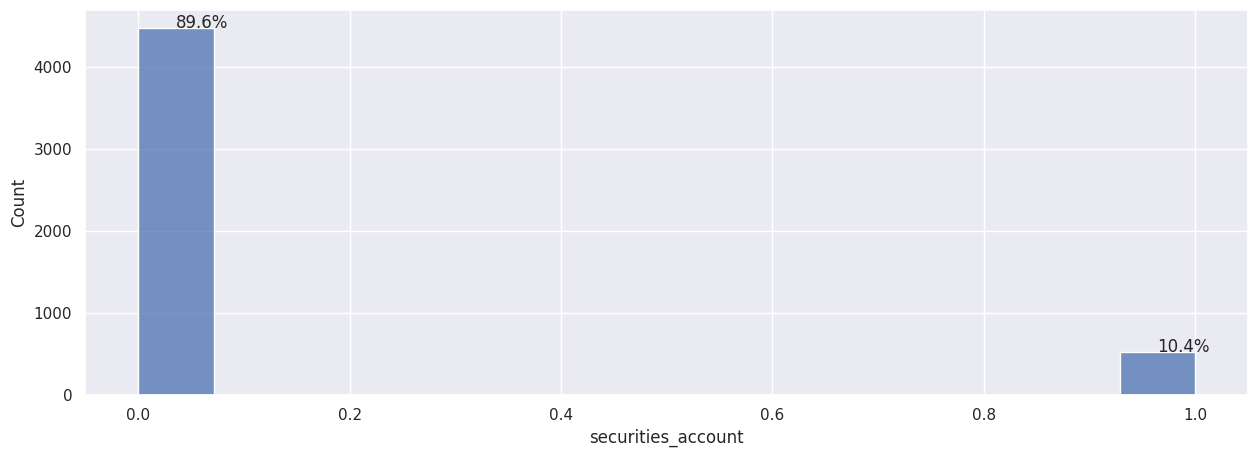

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(df.securities_account);
perc_on_bar_v(ax, df.securities_account)

Observations

*   Those customers without a securities_account make up the greatest proportion with 89.6%.

**Observations on cd_account.**

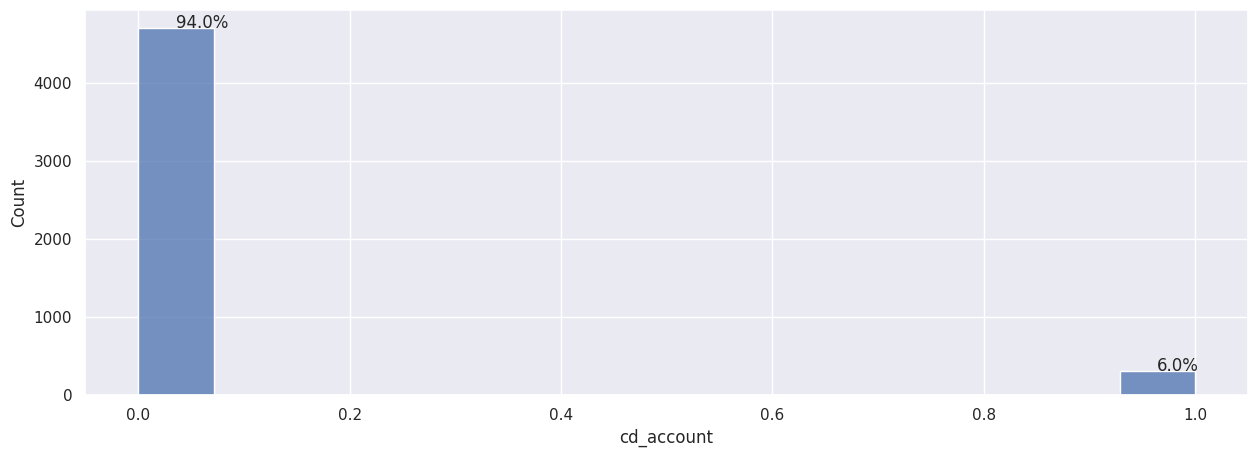

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(df.cd_account);
perc_on_bar_v(ax, df.cd_account)

**Observations**


*   Those customers without a cd_account make up the greatest percentage with 94%.





**Observations on online.**

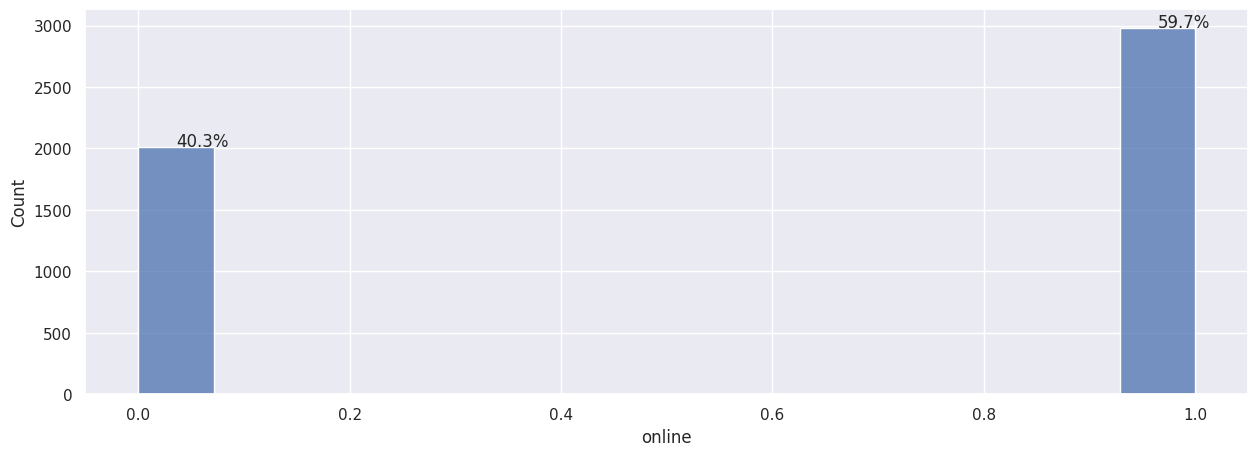

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(df.online);
perc_on_bar_v(ax, df.online)

**Observations**

*   Those customers that use online banking facilities makes up the majority with 59.7%.

**Observations on credit_card.**

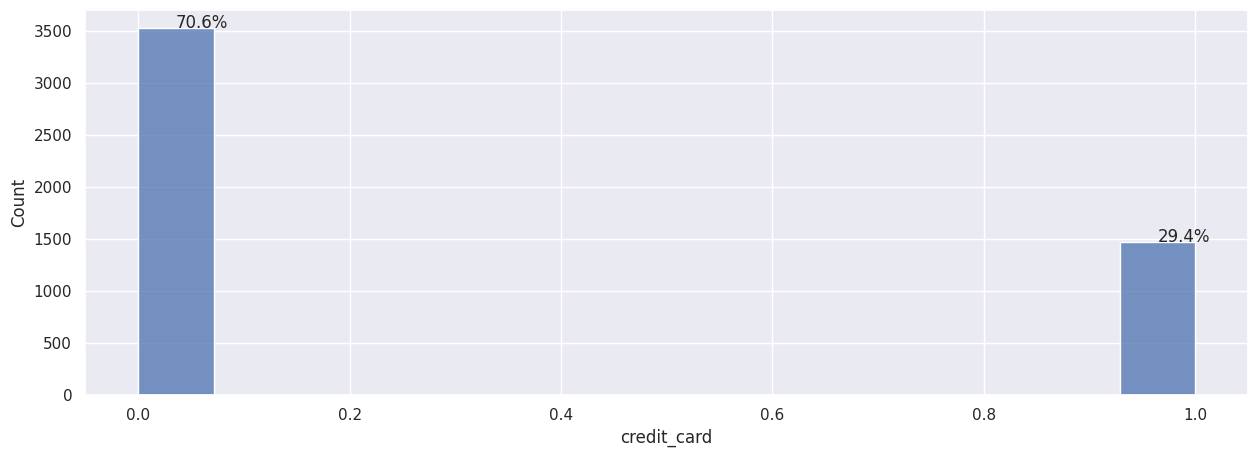

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(df.credit_card);
perc_on_bar_v(ax, df.credit_card)

**Observations**

*   Those customers that don't use credit_cards issued by other banks makes up the majority with 70.6%.

### Bivariate Analysis

In [ ]:
## Function to plot stacked bar chart
def stacked_plot(x, y):
    """
    Shows stacked plot from x and y pandas data series
    x: pandas data series
    y: pandas data series
    """
    info = pd.crosstab(x, y, margins=True)
    info['% - 0'] = round(info[0]/info['All']*100, 2)
    info['% - 1'] = round(info[1]/info['All']*100, 2)
    print(info)
    print('='*80)
    visual = pd.crosstab(x, y, normalize='index')
    visual.plot(kind='bar', stacked=True, figsize=(10,5));

In [ ]:
def show_boxplots(cols: list, feature: str, show_fliers=True, data=df): #method call to show bloxplots
    n_rows = math.ceil(len(cols)/2)
    plt.figure(figsize=(15, n_rows*5))
    for i, variable in enumerate(cols):
        plt.subplot(n_rows, 2, i+1)
        if show_fliers:
            sns.boxplot(x=feature, y=variable, data=df,palette="Paired", showfliers=True)
        else:
            sns.boxplot(x=feature, y=variable, data=df,palette="Paired", showfliers=False)
        plt.tight_layout()
        plt.title(variable, fontsize=12)
    plt.show()

**Correlation and heatmap.**

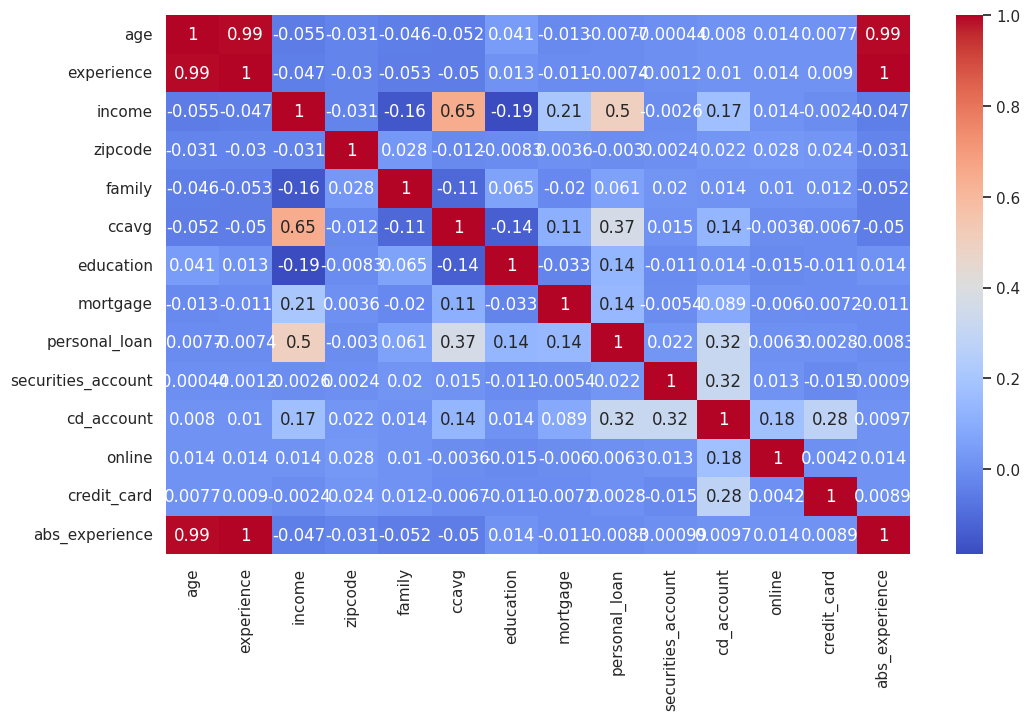

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm");

**Observations**

*   age and experience are heavily positively correlated.
*   ccavg and income are positively correlated.







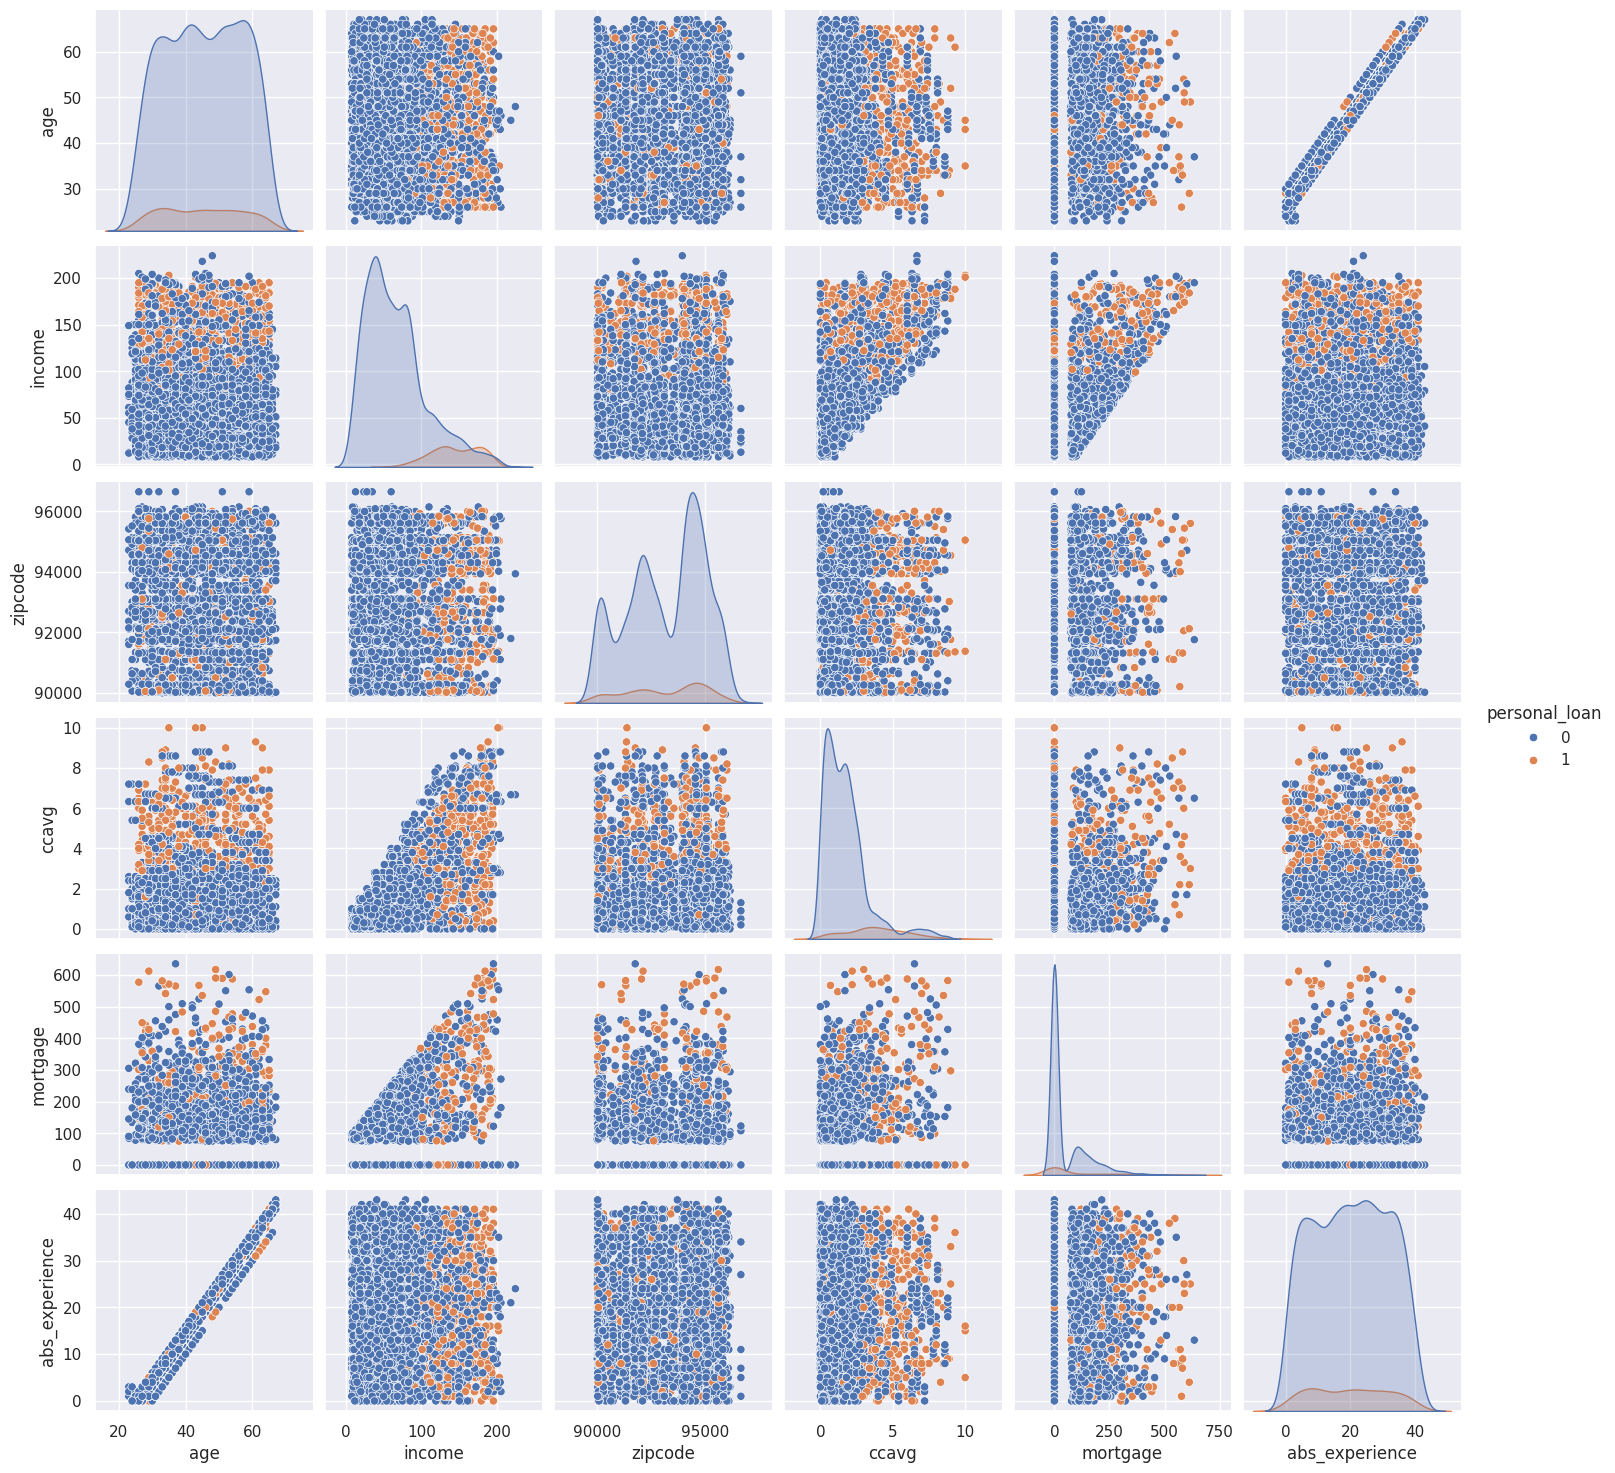

In [ ]:
sns.pairplot(data=df[['age','income','zipcode','ccavg',
                      'mortgage','abs_experience','personal_loan']],
             hue='personal_loan');

**Observations**

*   Plot show that income is higher among those customers with personal loans.
*   ccavg is higher among those customers with personal loans. we will investigate.

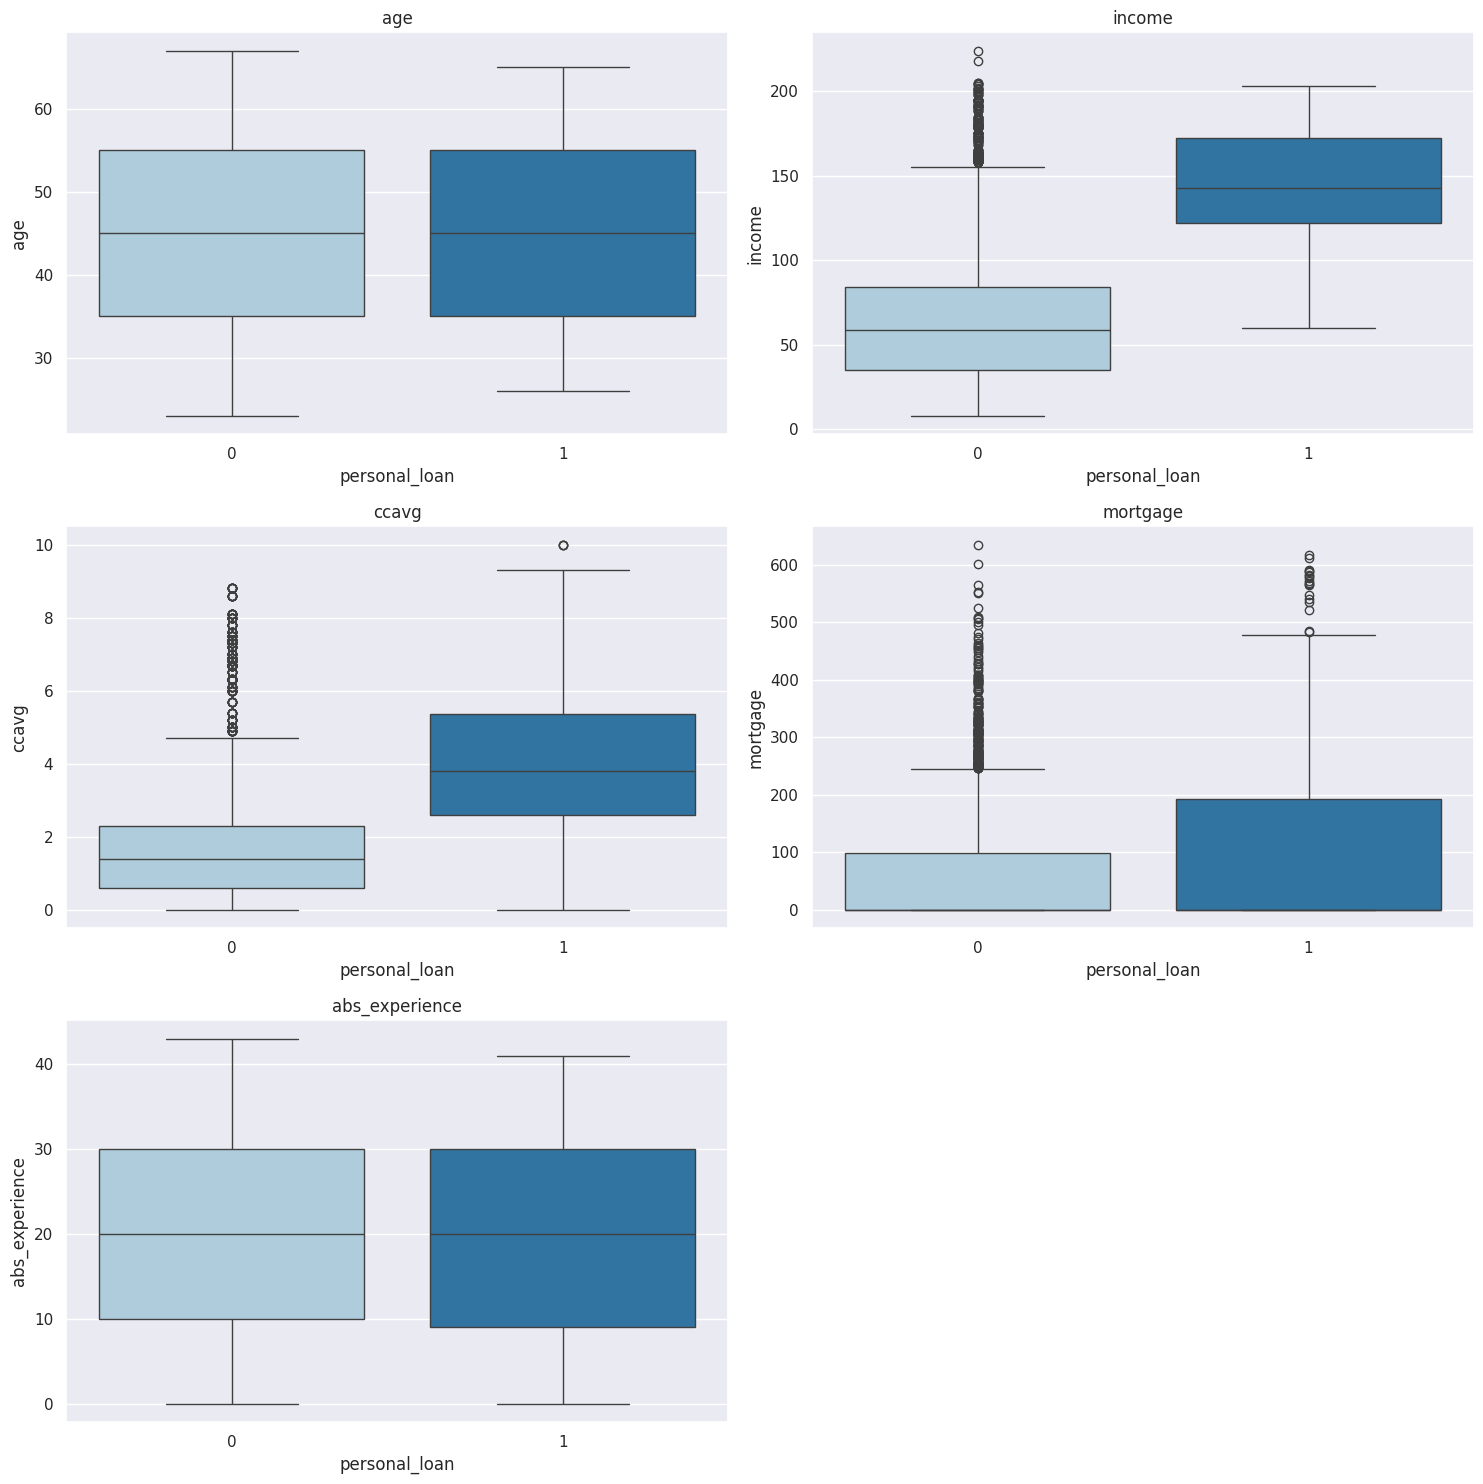

In [ ]:
cols = ['age','income','ccavg','mortgage','abs_experience']
show_boxplots(cols, 'personal_loan')

**Show without outliers in boxplots**

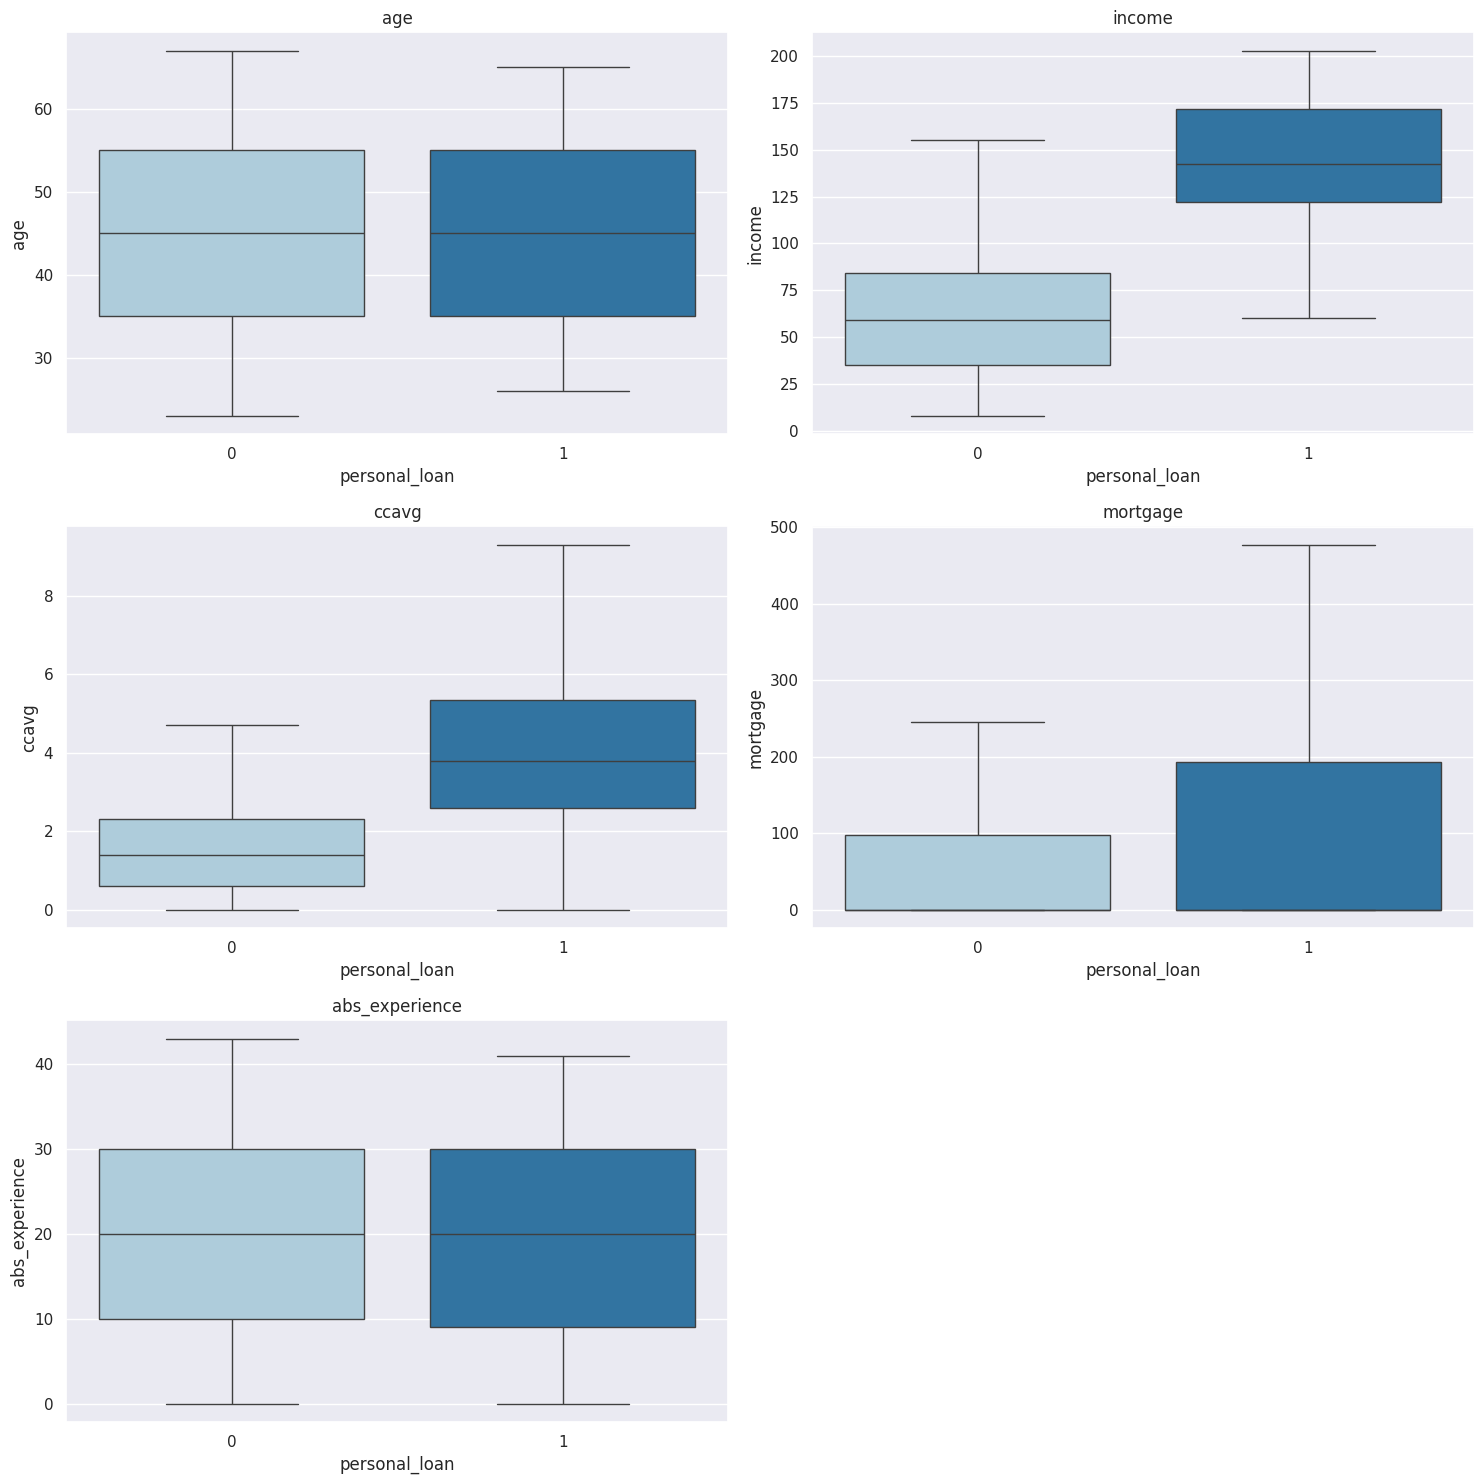

In [ ]:
show_boxplots(cols, 'personal_loan', show_fliers=False);

**Observations**

*  On average, those customers with higher incomes have personal loans.
*   On average, those customers with higher credit card usage have personal loans.
*   75% of those customers with personal loans have a mortgage payments of 500K or less.

**personal_loan vs family**

personal_loan     0    1   All  % - 0  % - 1
family                                      
1              1365  107  1472  92.73   7.27
2              1190  106  1296  91.82   8.18
3               877  133  1010  86.83  13.17
4              1088  134  1222  89.03  10.97
All            4520  480  5000  90.40   9.60


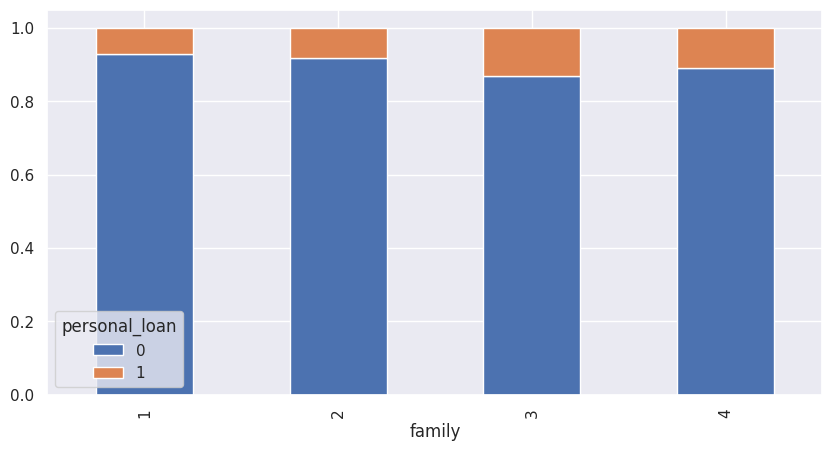

In [ ]:
stacked_plot(df.family, df.personal_loan)

**Observations**

*   Those customers with a family of 3 (13.17%) have more personal loans.
*   A family of 4(10.97%) have the second most personal loans followed by a family of 2(8.18%) and 1(7.27%).

**personal_loan vs education**

personal_loan     0    1   All  % - 0  % - 1
education                                   
1              2003   93  2096  95.56   4.44
2              1221  182  1403  87.03  12.97
3              1296  205  1501  86.34  13.66
All            4520  480  5000  90.40   9.60


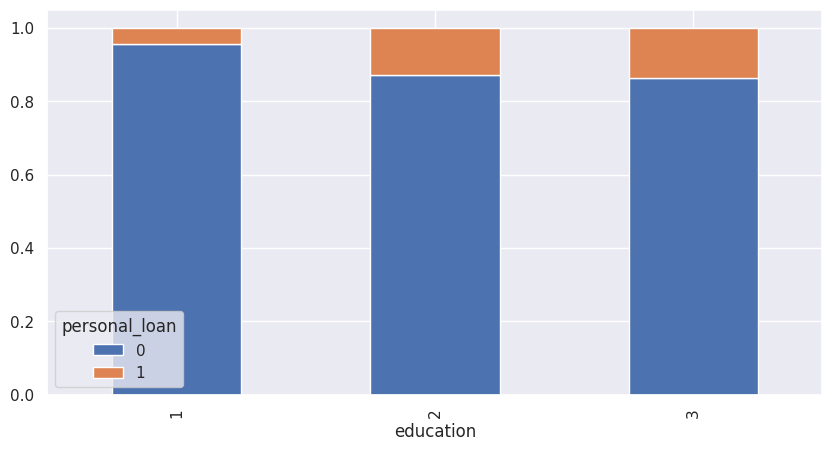

In [ ]:
stacked_plot(df.education, df.personal_loan)

**Observations**

*   Those customers with an education of '2'(Graduate) and '3' (Advanced/Professional) hold a greater percentage of personal loans that those customer with an education of '1'(Undergrad).

**personal_loan vs secuities_account**

personal_loan          0    1   All  % - 0  % - 1
securities_account                               
0                   4058  420  4478  90.62   9.38
1                    462   60   522  88.51  11.49
All                 4520  480  5000  90.40   9.60


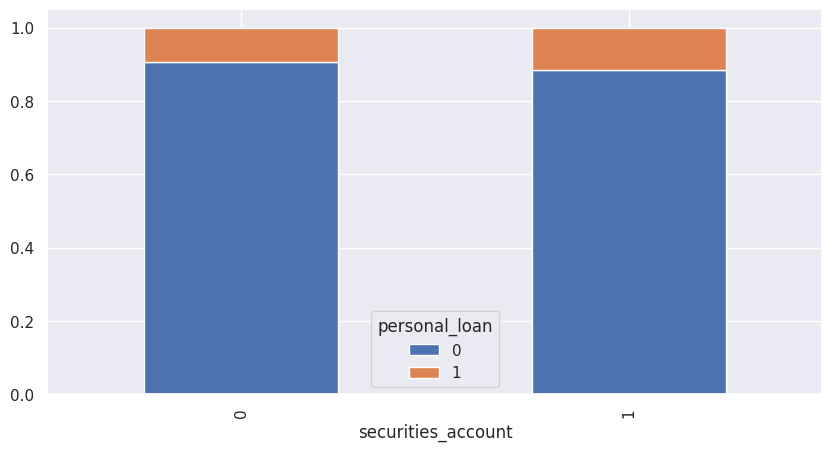

In [ ]:
stacked_plot(df.securities_account, df.personal_loan)

**Observations**

*   There is not much difference in securities account versus personal loans

**personal_loan vs cd_account**

personal_loan     0    1   All  % - 0  % - 1
cd_account                                  
0              4358  340  4698  92.76   7.24
1               162  140   302  53.64  46.36
All            4520  480  5000  90.40   9.60


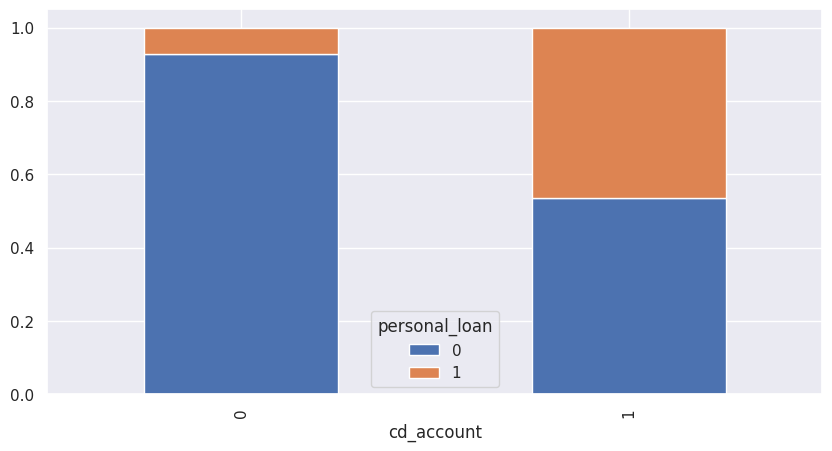

In [ ]:
stacked_plot(df.cd_account, df.personal_loan)

**Observations**

*   Those customers with cd accounts have a greater percentage of personal loans than those customer without a cd account.

**personal_loan vs online**

personal_loan     0    1   All  % - 0  % - 1
online                                      
0              1827  189  2016  90.62   9.38
1              2693  291  2984  90.25   9.75
All            4520  480  5000  90.40   9.60


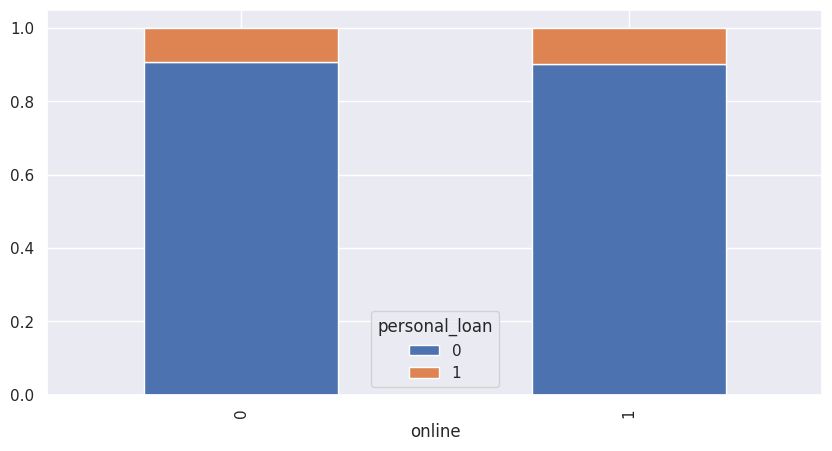

In [ ]:
stacked_plot(df.online, df.personal_loan)

**Observations**

*   There isnt much difference between customers who use online facilities and those who don't versus personal loans.

**personal_loan vs credit_card**

personal_loan     0    1   All  % - 0  % - 1
credit_card                                 
0              3193  337  3530  90.45   9.55
1              1327  143  1470  90.27   9.73
All            4520  480  5000  90.40   9.60


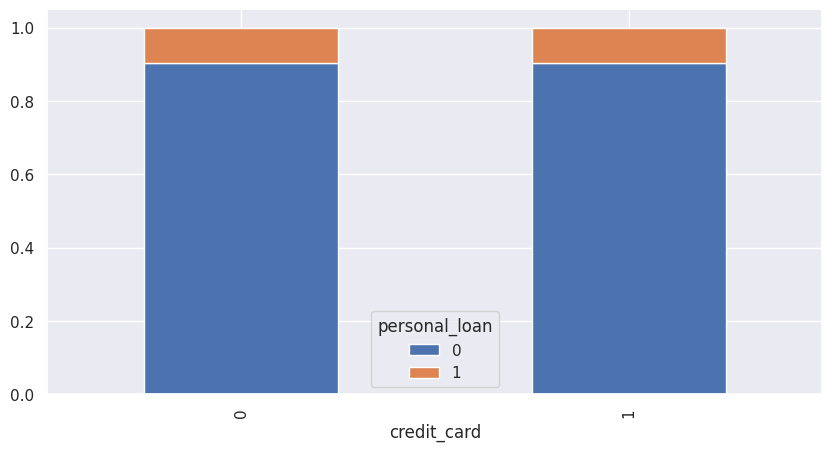

In [ ]:
stacked_plot(df.credit_card, df.personal_loan)

**Observations**

*   There isn't much difference between those who have credit cards from other banks versus personal loans.

**cd_account vs family**

cd_account     0    1   All  % - 0  % - 1
family                                   
1           1389   83  1472  94.36   5.64
2           1229   67  1296  94.83   5.17
3            928   82  1010  91.88   8.12
4           1152   70  1222  94.27   5.73
All         4698  302  5000  93.96   6.04


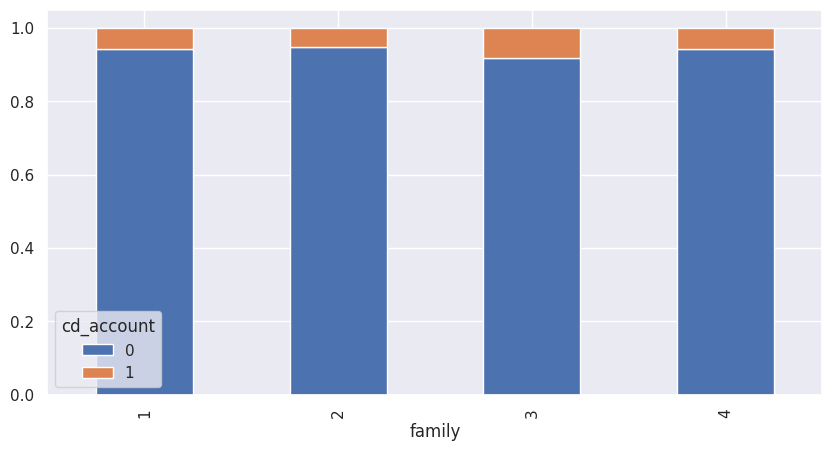

In [ ]:
stacked_plot(df.family, df.cd_account)

**Observations**

*   A family of 3 has the greatest percentage(8.12) of customers with cd accounts.

**cd_account vs education**

cd_account     0    1   All  % - 0  % - 1
education                                
1           1978  118  2096  94.37   5.63
2           1315   88  1403  93.73   6.27
3           1405   96  1501  93.60   6.40
All         4698  302  5000  93.96   6.04


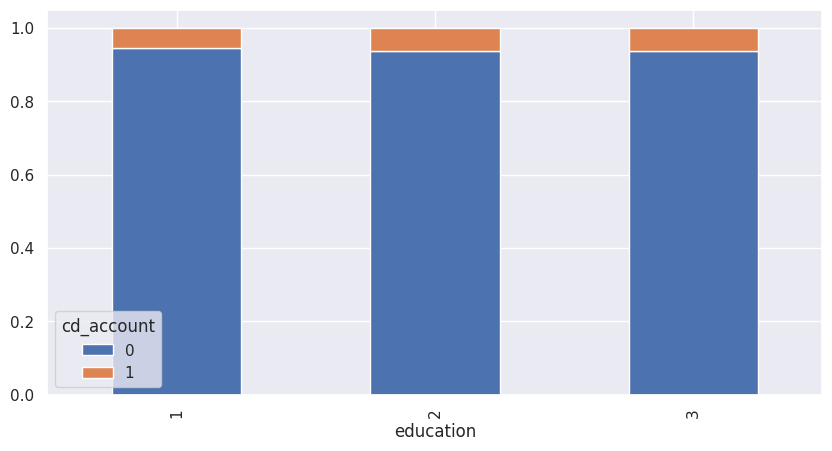

In [ ]:
stacked_plot(df.education, df.cd_account)

**Observations**

There isnt much of a difference between education categories.

**cd_account vs securities_account**

cd_account             0    1   All  % - 0  % - 1
securities_account                               
0                   4323  155  4478  96.54   3.46
1                    375  147   522  71.84  28.16
All                 4698  302  5000  93.96   6.04


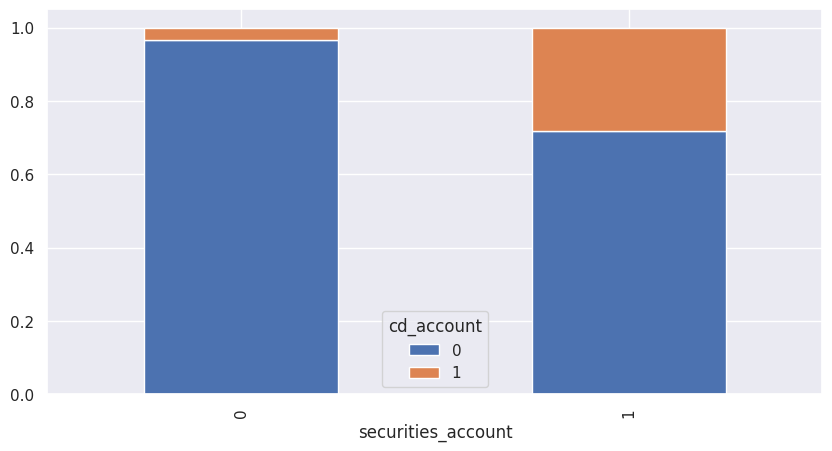

In [ ]:
stacked_plot(df.securities_account, df.cd_account)

**Observations**

*   A greater percentage of those customers with security accounts also have cd accounts versus those customer that dont have security accounts.

**cd_account vs online**

cd_account     0    1   All  % - 0  % - 1
online                                   
0           1997   19  2016  99.06   0.94
1           2701  283  2984  90.52   9.48
All         4698  302  5000  93.96   6.04


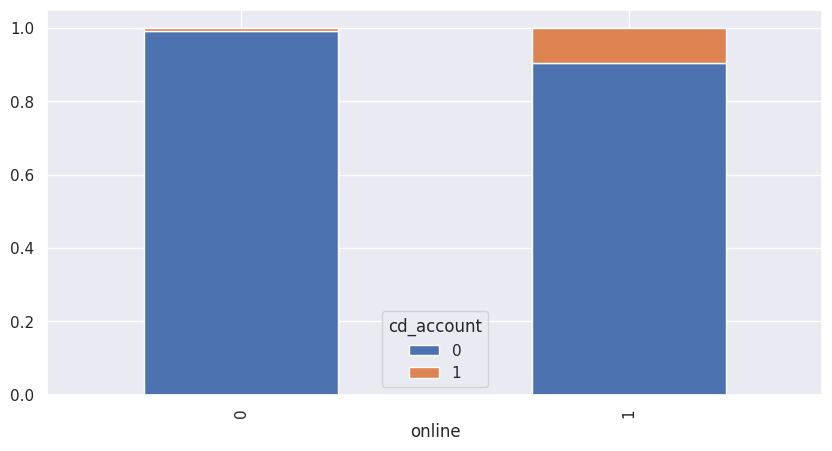

In [ ]:
stacked_plot(df.online, df.cd_account)

**Observations**

*   Customers who use the online facilities have a greater percentage cd accounts than those customer who don't use online facilities.

**cd_account vs credit_card**

cd_account      0    1   All  % - 0  % - 1
credit_card                               
0            3468   62  3530  98.24   1.76
1            1230  240  1470  83.67  16.33
All          4698  302  5000  93.96   6.04


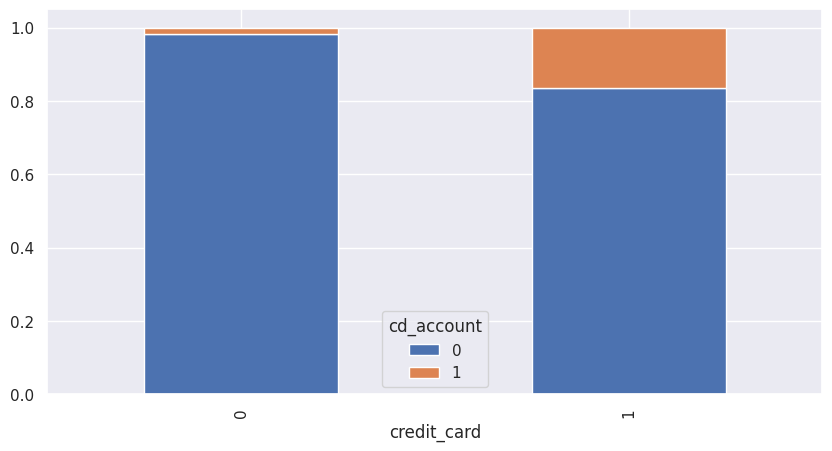

In [ ]:
stacked_plot(df.credit_card, df.cd_account)

**Observations**

*   A greater percentage of those customers who have credit cards with other bank institutions have personal cd accounts than those customers who dont have credit cards from other institutions.

**Let us check which of these differences are statistically significant.**

In [ ]:
def check_significance(feature1: str, feature2: str, data=df):
    """
    Checks the significance of feature1 agaisnt feature2
    feature1: column name
    feature2: column name
    data: pandas dataframe object (defaults to df)
    """
    crosstab = pd.crosstab(data[feature1], data[feature2])  # Contingency table of region and smoker attributes
    chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
    Ho = f"{feature1} has no effect on {feature2}"   # Stating the Null Hypothesis
    Ha = f"{feature1} has an effect on {feature2}"   # Stating the Alternate Hypothesis
    if p_value < 0.05:  # Setting our significance level at 5%
        print(f'{Ha.upper()} as the p_value ({p_value.round(3)}) < 0.05')
    else:
        print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

In [ ]:
def show_significance(features: list, data=df):
    """
    Prints out the significance of all the list of features passed.
    features: list of column names
    data: pandas dataframe object (defaults to df)
    """
    for feature in features:
        print("="*30, feature, "="*(50-len(feature)))
        for col in list(data.columns):
            if col != feature: check_significance(col , feature)

In [ ]:
show_significance(['personal_loan', 'cd_account'])

============================== personal_loan =====================================
age has no effect on personal_loan as the p_value (0.12) > 0.05
experience has no effect on personal_loan as the p_value (0.704) > 0.05
INCOME HAS AN EFFECT ON PERSONAL_LOAN as the p_value (0.0) < 0.05
zipcode has no effect on personal_loan as the p_value (0.76) > 0.05
FAMILY HAS AN EFFECT ON PERSONAL_LOAN as the p_value (0.0) < 0.05
CCAVG HAS AN EFFECT ON PERSONAL_LOAN as the p_value (0.0) < 0.05
EDUCATION HAS AN EFFECT ON PERSONAL_LOAN as the p_value (0.0) < 0.05
MORTGAGE HAS AN EFFECT ON PERSONAL_LOAN as the p_value (0.0) < 0.05
securities_account has no effect on personal_loan as the p_value (0.141) > 0.05
CD_ACCOUNT HAS AN EFFECT ON PERSONAL_LOAN as the p_value (0.0) < 0.05
online has no effect on personal_loan as the p_value (0.693) > 0.05
credit_card has no effect on personal_loan as the p_value (0.884) > 0.05
abs_experience has no effect on personal_loan as the p_value (0.805) > 0.05
============

**Key Observations -**

**cd_account, family and education** seem to be strong indicators of customers received a ***personal loan.***

**securities_account, online and credit_card** seem to be strong indicators of customers who have ***cd accounts***.

Other factors appear to be not very good indicators of those customers that have cd accounts.


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

**There are no missing values to be treated**

In [ ]:
try:
    df.drop(['experience'], axis=1, inplace=True)
except KeyError:
    print(f"Column experience must already be dropped.")
df.head()

age  income  zipcode family  ccavg education  mortgage  personal_loan  \
0   25      49    91107      4    1.6         1         0              0   
1   45      34    90089      3    1.5         1         0              0   
2   39      11    94720      1    1.0         1         0              0   
3   35     100    94112      1    2.7         2         0              0   
4   35      45    91330      4    1.0         2         0              0   

   securities_account  cd_account  online  credit_card  abs_experience  
0                   1           0       0            0               1  
1                   1           0       0            0              19  
2                   0           0       0            0              15  
3                   0           0       0            0               9  
4                   0           0       0            1               8

In [ ]:
df_dummies = pd.get_dummies(df, columns=['education', 'family'], drop_first=True)
df_dummies.head()

age  income  zipcode  ccavg  mortgage  personal_loan  securities_account  \
0   25      49    91107    1.6         0              0                   1   
1   45      34    90089    1.5         0              0                   1   
2   39      11    94720    1.0         0              0                   0   
3   35     100    94112    2.7         0              0                   0   
4   35      45    91330    1.0         0              0                   0   

   cd_account  online  credit_card  abs_experience  education_2  education_3  \
0           0       0            0               1        False        False   
1           0       0            0              19        False        False   
2           0       0            0              15        False        False   
3           0       0            0               9         True        False   
4           0       0            1               8         True        False   

   family_2  family_3  family_4  
0     False     False      True  
1     False      True     False  
2     False     False     False  
3     False     False     False  
4     False     False      True

In [ ]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5000 non-null   int64  
 1   income              5000 non-null   int64  
 2   zipcode             5000 non-null   int64  
 3   ccavg               5000 non-null   float64
 4   mortgage            5000 non-null   int64  
 5   personal_loan       5000 non-null   int64  
 6   securities_account  5000 non-null   int64  
 7   cd_account          5000 non-null   int64  
 8   online              5000 non-null   int64  
 9   credit_card         5000 non-null   int64  
 10  abs_experience      5000 non-null   int64  
 11  education_2         5000 non-null   bool   
 12  education_3         5000 non-null   bool   
 13  family_2            5000 non-null   bool   
 14  family_3            5000 non-null   bool   
 15  family_4            5000 non-null   bool   
dtypes: boo

**Partition Data**

In [ ]:
X = df_dummies.drop(['personal_loan'], axis=1)
X.head(10)

age  income  zipcode  ccavg  mortgage  securities_account  cd_account  \
0   25      49    91107    1.6         0                   1           0   
1   45      34    90089    1.5         0                   1           0   
2   39      11    94720    1.0         0                   0           0   
3   35     100    94112    2.7         0                   0           0   
4   35      45    91330    1.0         0                   0           0   
5   37      29    92121    0.4       155                   0           0   
6   53      72    91711    1.5         0                   0           0   
7   50      22    93943    0.3         0                   0           0   
8   35      81    90089    0.6       104                   0           0   
9   34     180    93023    8.9         0                   0           0   

   online  credit_card  abs_experience  education_2  education_3  family_2  \
0       0            0               1        False        False     False   
1       0            0              19        False        False     False   
2       0            0              15        False        False     False   
3       0            0               9         True        False     False   
4       0            1               8         True        False     False   
5       1            0              13         True        False     False   
6       1            0              27         True        False      True   
7       0            1              24        False         True     False   
8       1            0              10         True        False     False   
9       0            0               9        False         True     False   

   family_3  family_4  
0     False      True  
1      True     False  
2     False     False  
3     False     False  
4     False      True  
5     False      True  
6     False     False  
7     False     False  
8      True     False  
9     False     False

In [ ]:
y = df_dummies['personal_loan']
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: personal_loan, dtype: int64

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("The shape of X_train: ", X_train.shape)
print("The shape of X_test: ", X_test.shape)

The shape of X_train:  (3500, 15)
The shape of X_test:  (1500, 15)


## Model Building

**Build Initial Decision Tree Model**

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.


If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.


In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.


class_weight is a hyperparameter for the decision tree classifier.


In [ ]:
model = DecisionTreeClassifier(criterion='gini',
                               class_weight={0:0.15, 1:0.85},
                               random_state=1)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,  y_actual, labels=[1, 0], xtest=X_test):
    """
    model : classifier to predict values of X
    y_actual : ground truth
    """
    y_predict = model.predict(xtest)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index=["Actual - No","Actual - Yes"],
                         columns=['Predicted - No','Predicted - Yes'])
    #print(df_cm)
    #print("="*80)

    group_counts = [f"{value:0.0f}" for value in cm.flatten()]
    group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]

    labels = [f"{gc}\n{gp}" for gc, gp in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize = (10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14);

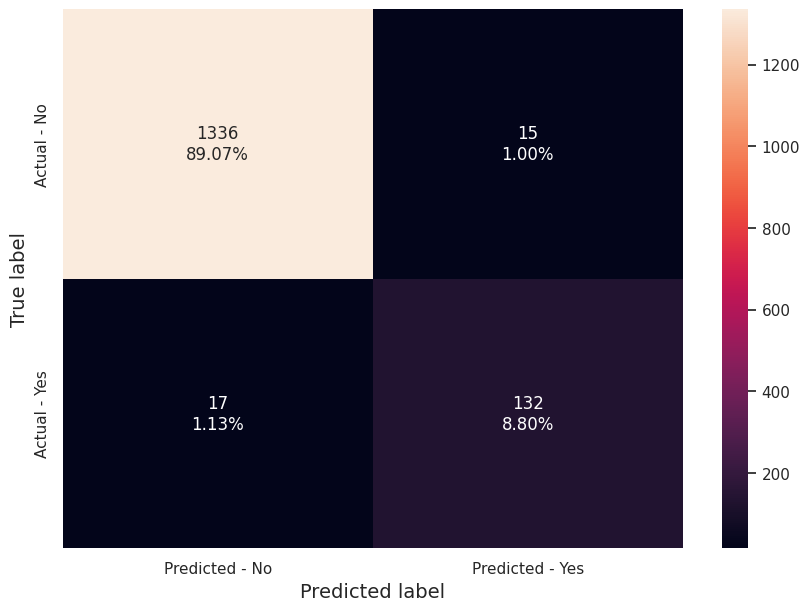

In [ ]:
make_confusion_matrix(model, y_test)

In [ ]:
y_train.value_counts(normalize=True)

personal_loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64

**Observations**

We only have ~10% of positive classes, so if our model marks each sample as negative, then also we'll get 90% accuracy, hence accuracy is not a good metric to evaluate here.

In [ ]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    Prints the recall score from model
    model : classifier to predict values of X
    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))

**Recall score from baseline model.**

In [ ]:
# Recall on train and test
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8859060402684564


**Visualizing the decision tree from baseline model**

In [ ]:
feature_names = list(X.columns)
print(feature_names)

['age', 'income', 'zipcode', 'ccavg', 'mortgage', 'securities_account', 'cd_account', 'online', 'credit_card', 'abs_experience', 'education_2', 'education_3', 'family_2', 'family_3', 'family_4']


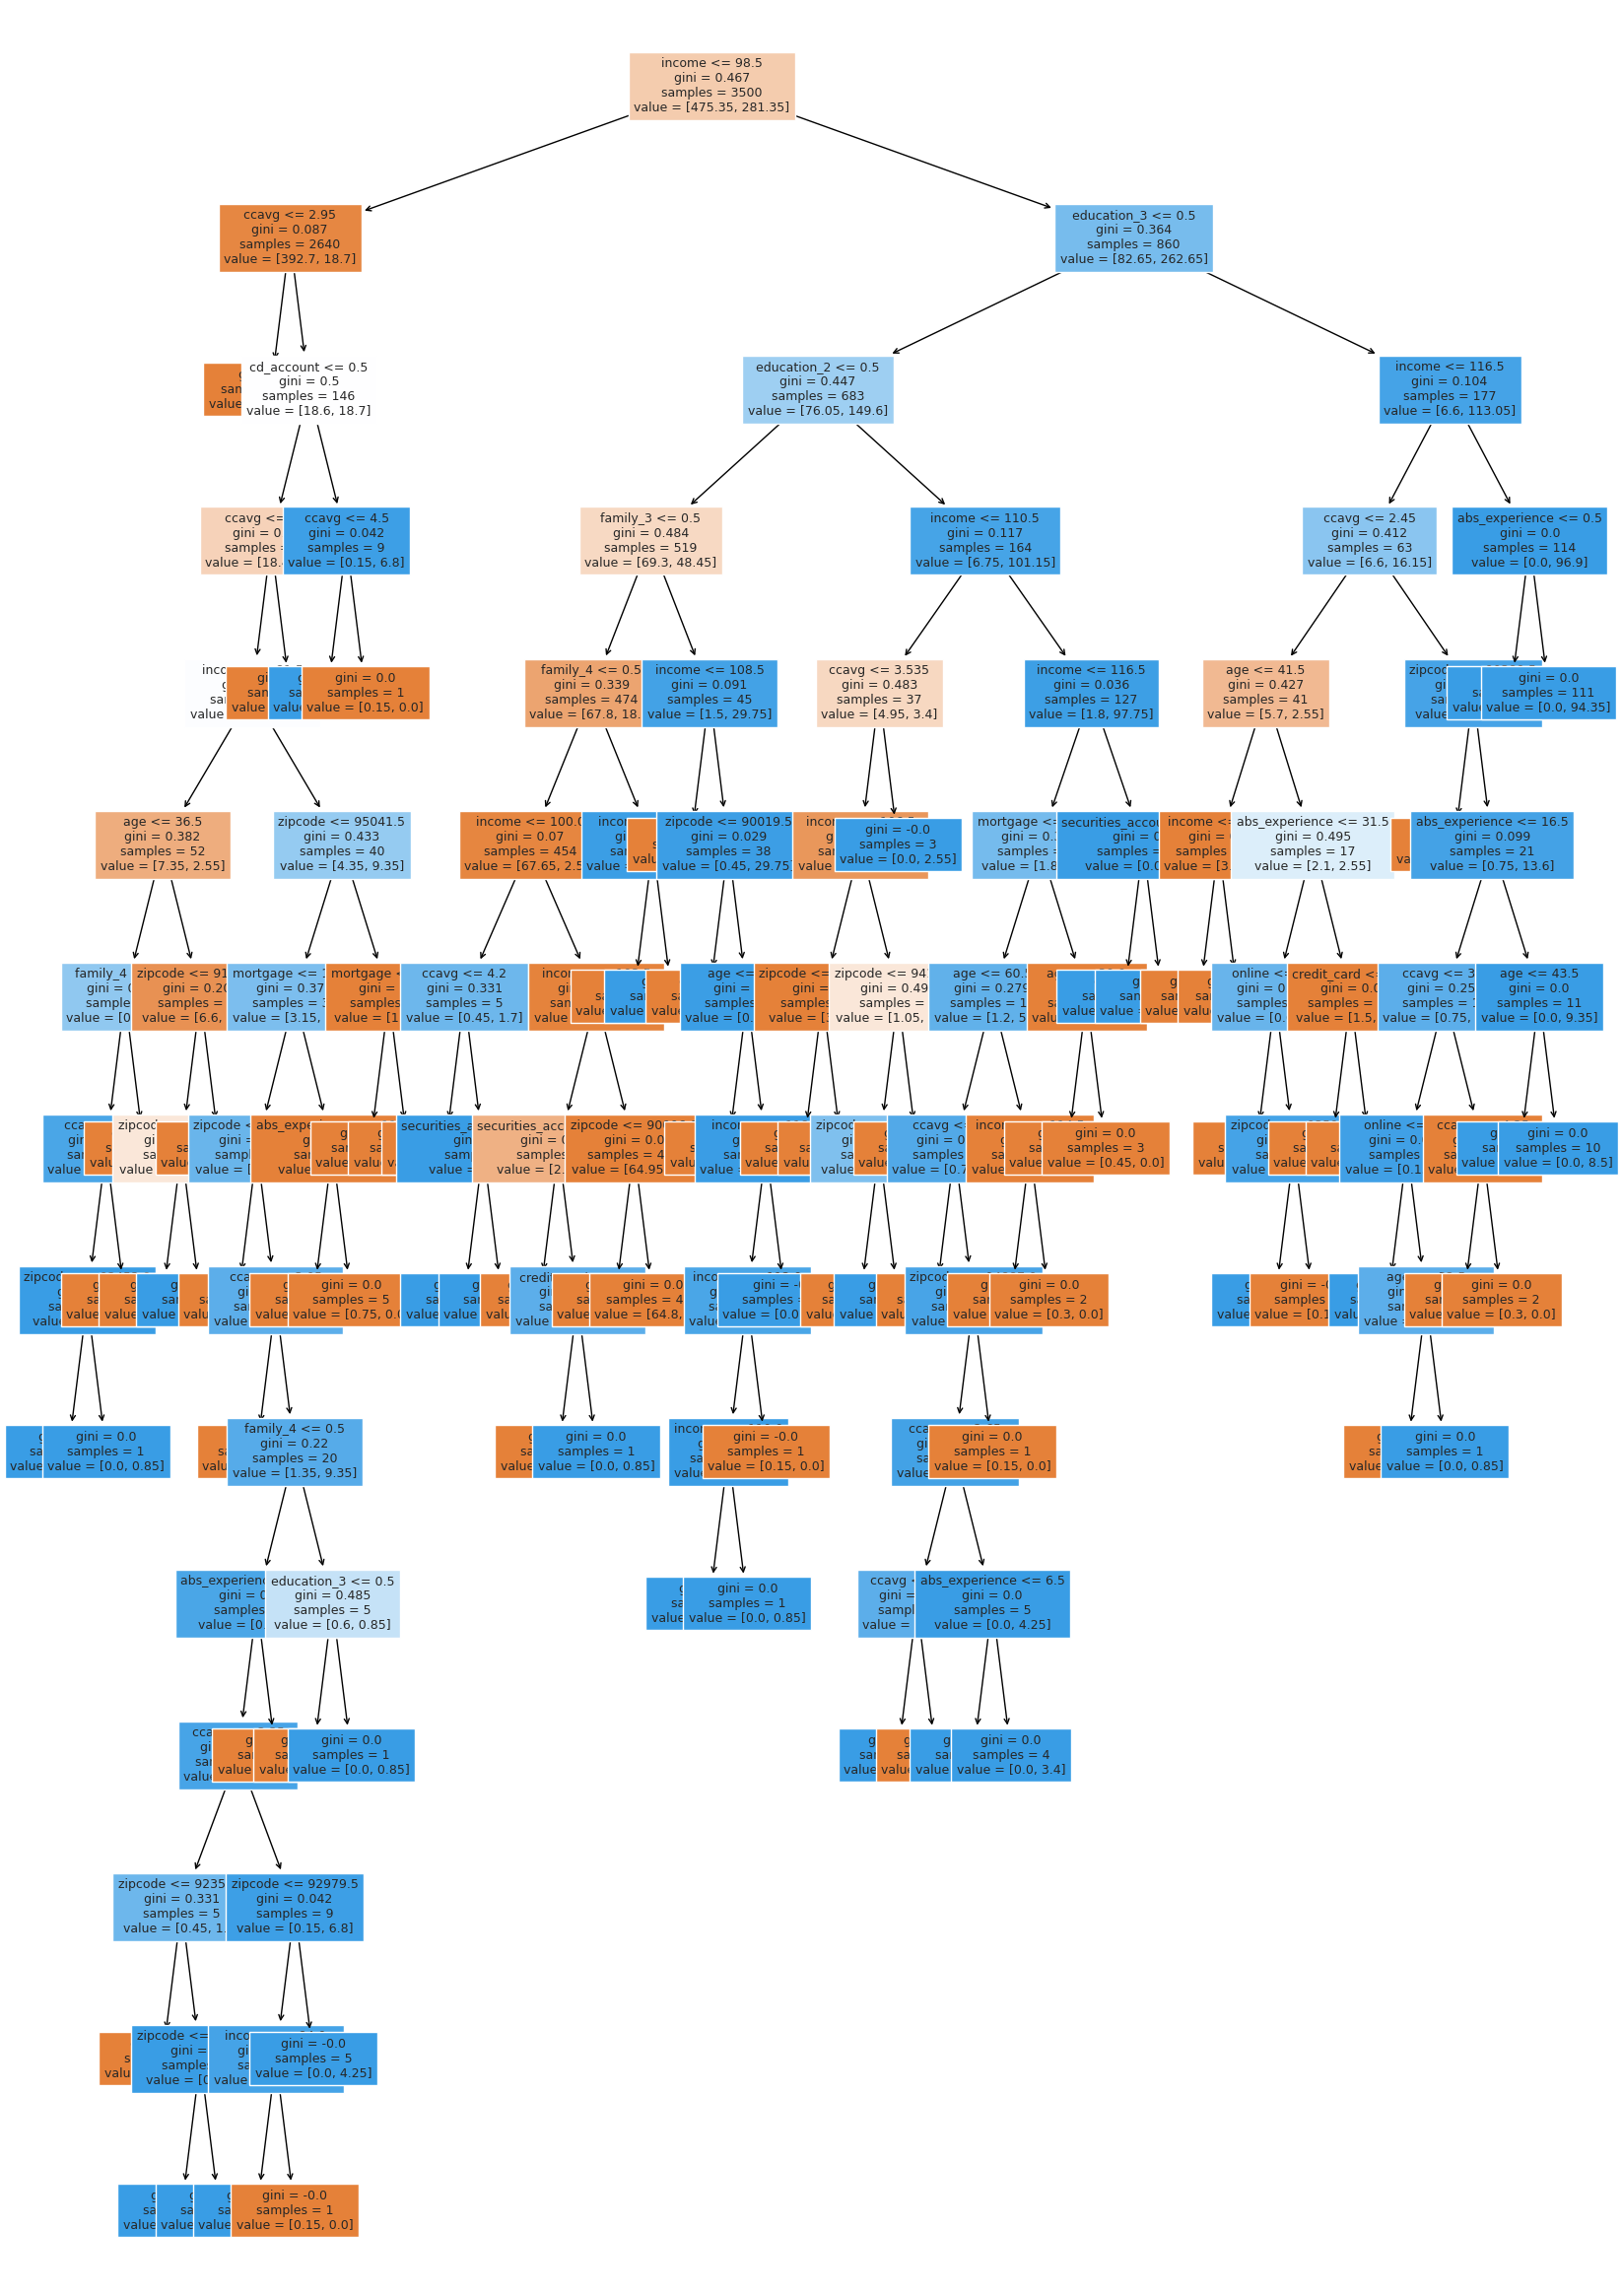

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(model,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=9,
                     node_ids=False,
                     class_names=None,)

#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- income <= 98.50
|   |--- ccavg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- ccavg >  2.95
|   |   |--- cd_account <= 0.50
|   |   |   |--- ccavg <= 3.95
|   |   |   |   |--- income <= 81.50
|   |   |   |   |   |--- age <= 36.50
|   |   |   |   |   |   |--- family_4 <= 0.50
|   |   |   |   |   |   |   |--- ccavg <= 3.50
|   |   |   |   |   |   |   |   |--- zipcode <= 92453.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- zipcode >  92453.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- ccavg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- family_4 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- age >  36.50
|   |   |   |   |   |   |--- zipcode <= 91269.00
|   |   |   |   |   |   |   |--- zipcode <= 90974.00
|   |   |   |   |   |   |   |   |

**Feature importance from baseline model**

In [ ]:
def importance_plot(model):
    """
    Displays feature importance barplot
    model: decision tree classifier
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)
    size = len(indices)//2 # to help scale the plot.

    plt.figure(figsize=(10, size))
    plt.title("Feature Importances", fontsize=14)
    plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance", fontsize=12);

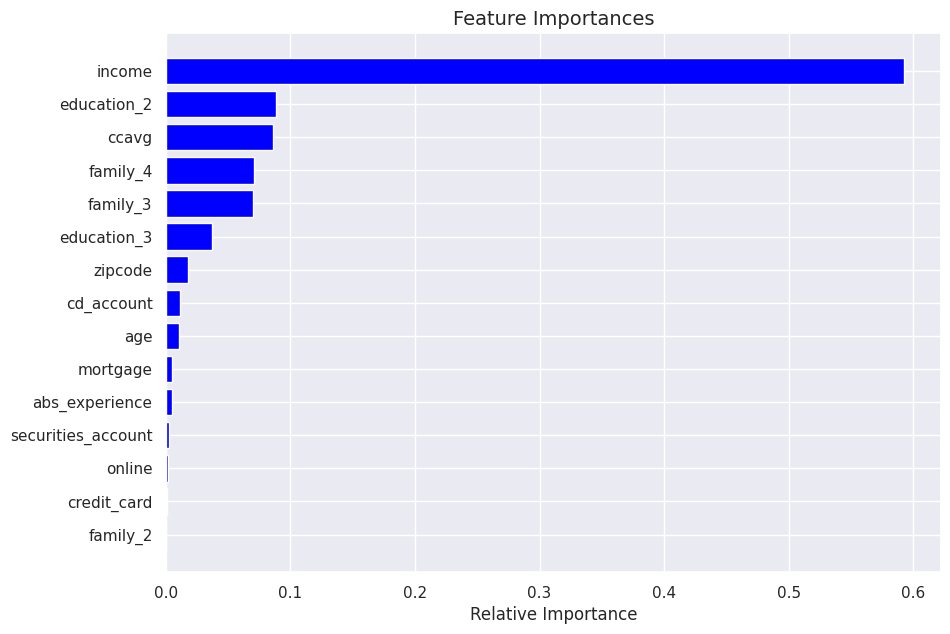

In [ ]:
importance_plot(model=model)

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
pd.DataFrame(model.feature_importances_,
                   columns=["Imp"],
                   index=X_train.columns).sort_values(by='Imp', ascending=False)

Imp
income              0.592431
education_2         0.088134
ccavg               0.085866
family_4            0.071136
family_3            0.070324
education_3         0.037138
zipcode             0.017887
cd_account          0.011000
age                 0.010398
mortgage            0.005239
abs_experience      0.004911
securities_account  0.002769
online              0.002045
credit_card         0.000721
family_2            0.000000

**Using GridSearch for hyperparameter tuning of our tree model.**

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0:.15,1:.85})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(1,10),
              'criterion': ['entropy','gini'],
              'splitter': ['best','random'],
              'min_impurity_decrease': [0.000001,0.00001,0.0001],
              'max_features': ['log2','sqrt']}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, param_grid=parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=3, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

**Confusion matrix using GridSearchCV**

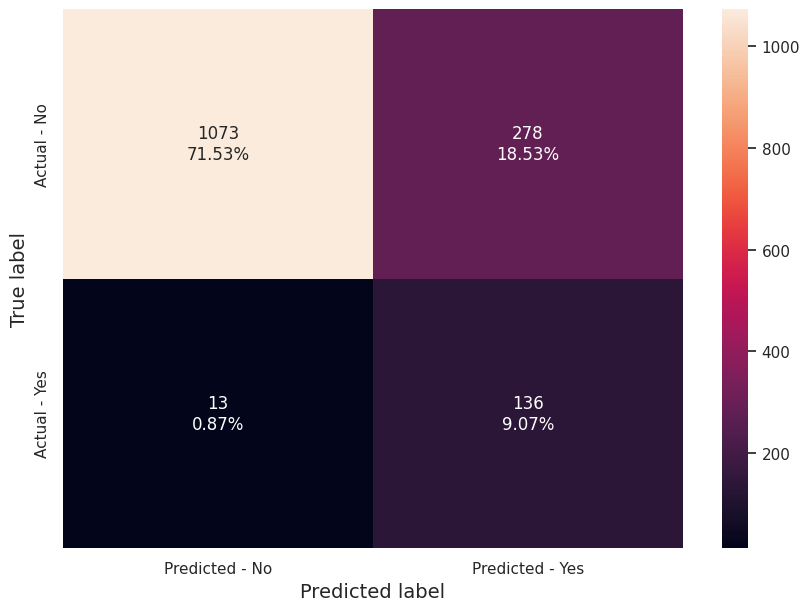

In [ ]:
make_confusion_matrix(estimator, y_test)

**Recall score using GridSearchCV**

In [ ]:
get_recall_score(estimator)

Recall on training set :  0.9546827794561934
Recall on test set :  0.912751677852349


**Visualizing the decision tree from the best fit estimator using GridSearchCV**

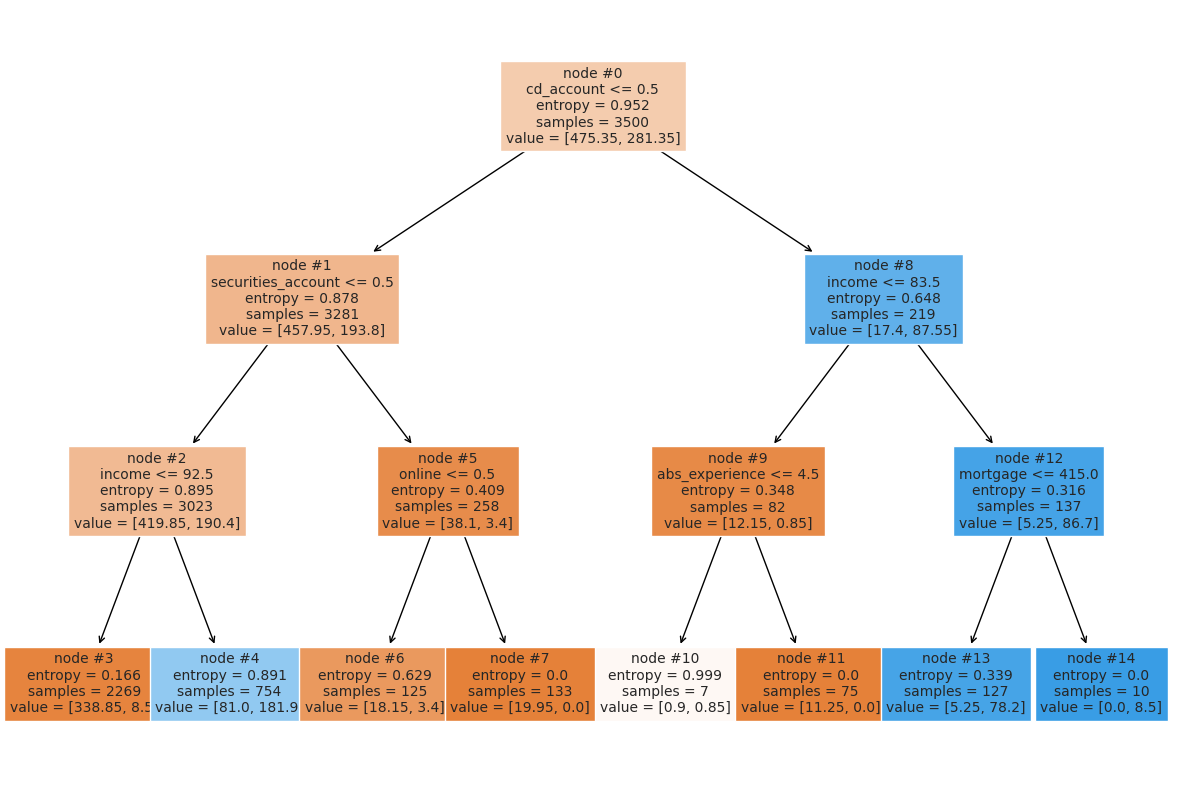

In [ ]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(estimator,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=10,
                     node_ids=True,
                     class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator,
                       feature_names=feature_names,
                       show_weights=True))

|--- cd_account <= 0.50
|   |--- securities_account <= 0.50
|   |   |--- income <= 92.50
|   |   |   |--- weights: [338.85, 8.50] class: 0
|   |   |--- income >  92.50
|   |   |   |--- weights: [81.00, 181.90] class: 1
|   |--- securities_account >  0.50
|   |   |--- online <= 0.50
|   |   |   |--- weights: [18.15, 3.40] class: 0
|   |   |--- online >  0.50
|   |   |   |--- weights: [19.95, 0.00] class: 0
|--- cd_account >  0.50
|   |--- income <= 83.50
|   |   |--- abs_experience <= 4.50
|   |   |   |--- weights: [0.90, 0.85] class: 0
|   |   |--- abs_experience >  4.50
|   |   |   |--- weights: [11.25, 0.00] class: 0
|   |--- income >  83.50
|   |   |--- mortgage <= 415.00
|   |   |   |--- weights: [5.25, 78.20] class: 1
|   |   |--- mortgage >  415.00
|   |   |   |--- weights: [0.00, 8.50] class: 1



### Model Performance Improvement

**Cost Complexity Pruning**

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight = {0:0.15, 1:0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -6.298297e-15
1   7.482671e-19 -6.297548e-15
2   7.482671e-19 -6.296800e-15
3   7.482671e-19 -6.296052e-15
4   7.482671e-19 -6.295303e-15
5   2.420864e-18 -6.292883e-15
6   2.494224e-18 -6.290388e-15
7   2.905037e-18 -6.287483e-15
8   3.521257e-18 -6.283962e-15
9   4.115469e-18 -6.279847e-15
10  4.665666e-18 -6.275181e-15
11  6.998499e-18 -6.268182e-15
12  7.042514e-18 -6.261140e-15
13  7.394640e-18 -6.253745e-15
14  7.438656e-18 -6.246307e-15
15  8.081285e-17 -6.165494e-15
16  1.143528e-16 -6.051141e-15
17  2.985586e-16 -5.752582e-15
18  1.914713e-04  3.829427e-04
19  1.939508e-04  7.708443e-04
20  1.972347e-04  1.165314e-03
21  3.369896e-04  1.502303e-03
22  3.643130e-04  1.866616e-03
23  3.685823e-04  2.972363e-03
24  3.744328e-04  3.346796e-03
25  3.879017e-04  3.734698e-03
26  3.885915e-04  4.511881e-03
27  3.928099e-04  4.904691e-03
28  4.778878e-04  6.338354e-03
29  5.860688e-04  6.924423e-03
30  6.160535e-04  8.772584e-03
31  6.284400e-04  1.065790e-02
32  6.546462e-04  1.131255e-02
33  6.554717e-04  1.196802e-02
34  6.758139e-04  1.264384e-02
35  8.789656e-04  1.352280e-02
36  9.093369e-04  1.443214e-02
37  9.404360e-04  1.537257e-02
38  9.407728e-04  1.725412e-02
39  9.951370e-04  1.924439e-02
40  1.011155e-03  2.025555e-02
41  1.013173e-03  2.126872e-02
42  1.018946e-03  2.228767e-02
43  1.086501e-03  2.337417e-02
44  1.434181e-03  2.480835e-02
45  1.619124e-03  2.642747e-02
46  1.638043e-03  2.806552e-02
47  1.686407e-03  3.143833e-02
48  2.602631e-03  3.404096e-02
49  2.742431e-03  3.678339e-02
50  3.335999e-03  4.011939e-02
51  3.409906e-03  4.352930e-02
52  3.527226e-03  4.705652e-02
53  4.797122e-03  5.665076e-02
54  5.138280e-03  6.178904e-02
55  6.725814e-03  6.851486e-02
56  2.253222e-02  9.104708e-02
57  3.057320e-02  2.133399e-01
58  2.537957e-01  4.671356e-01

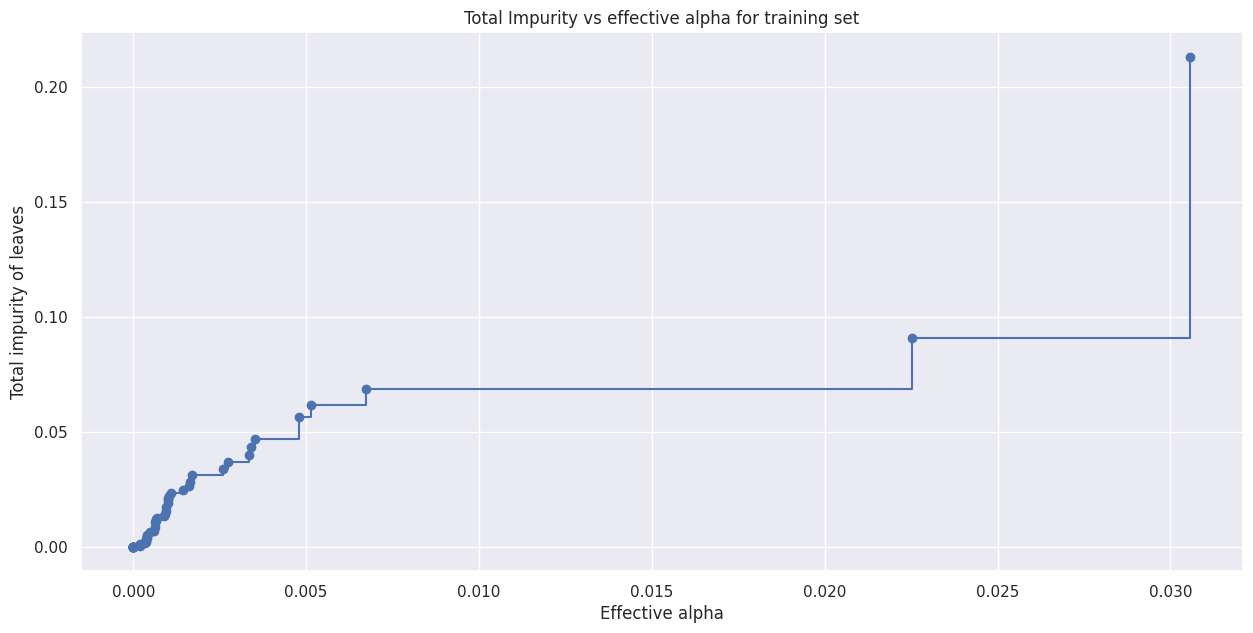

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1,
                                 ccp_alpha=ccp_alpha,
                                 class_weight = {0:0.15,1:0.85})
    clf.fit(X_train, y_train)
    clfs.append(clf)

print(f"Number of nodes in the last tree is: {clfs[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]}")

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2537957148948104


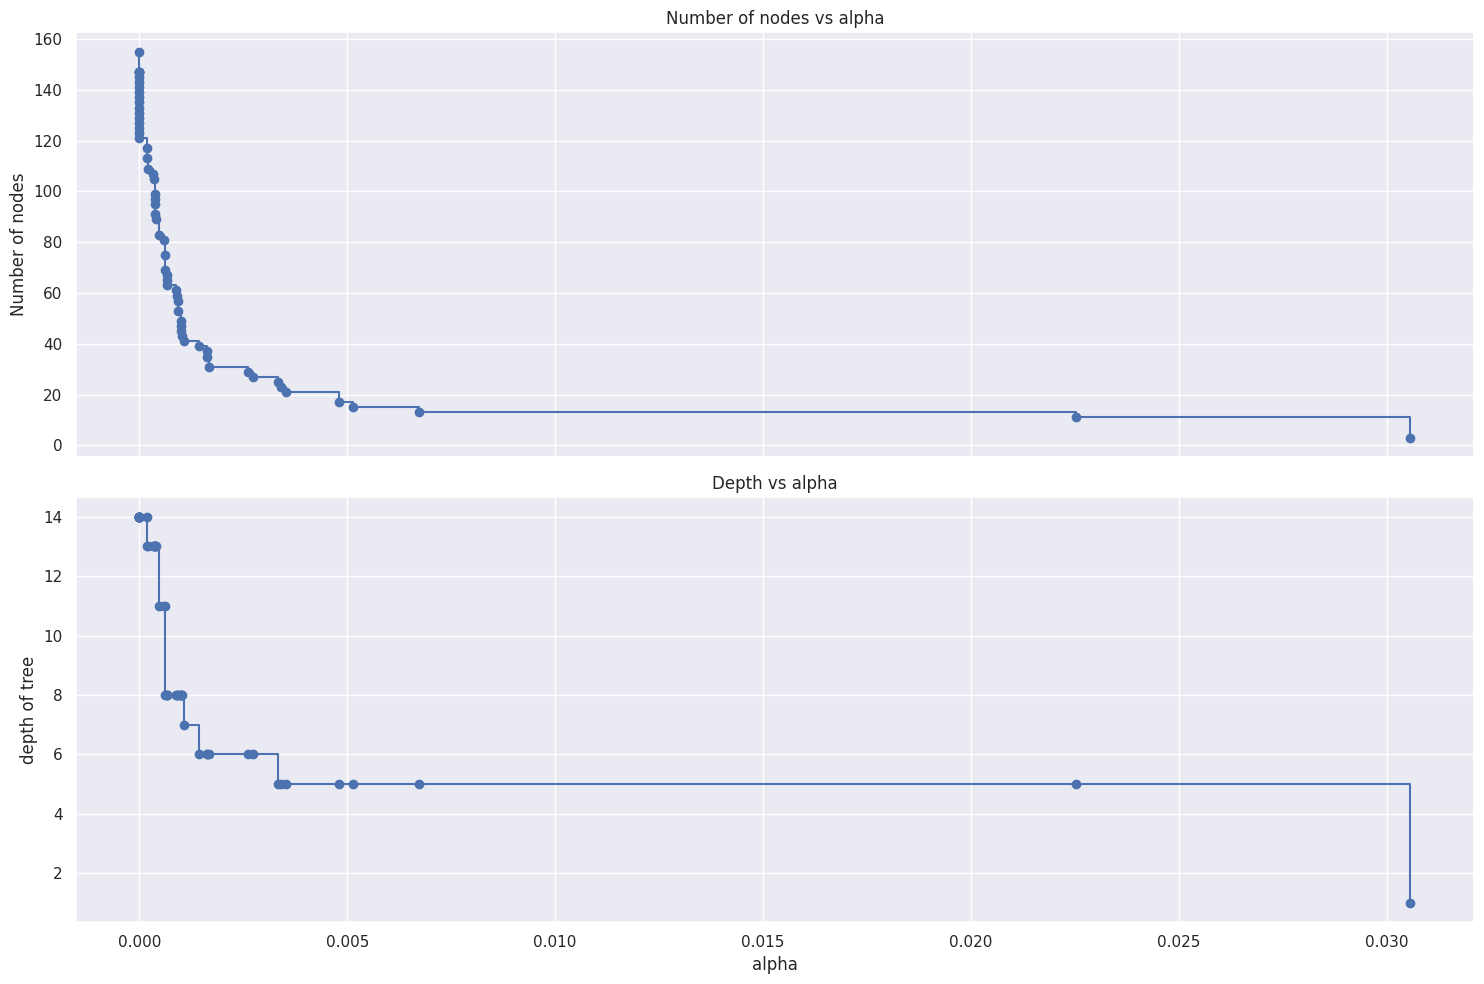

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

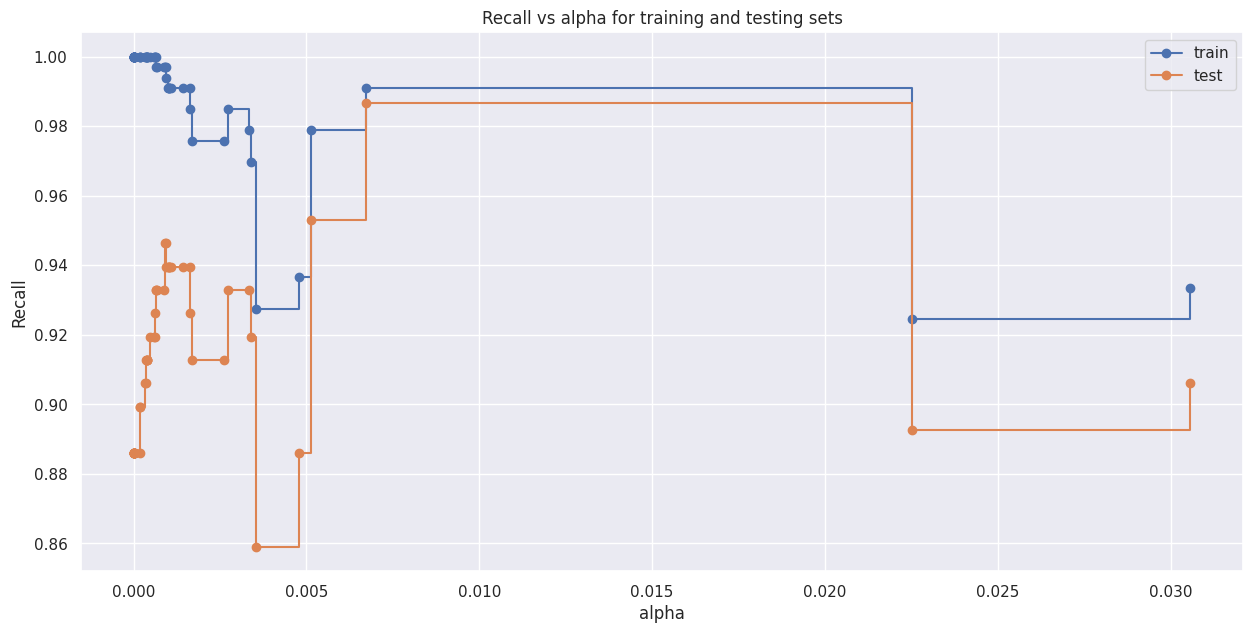

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas,
        recall_train,
        marker='o',
        label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas,
        recall_test,
        marker='o',
        label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.006725813690406986,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [ ]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006725813690406986,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

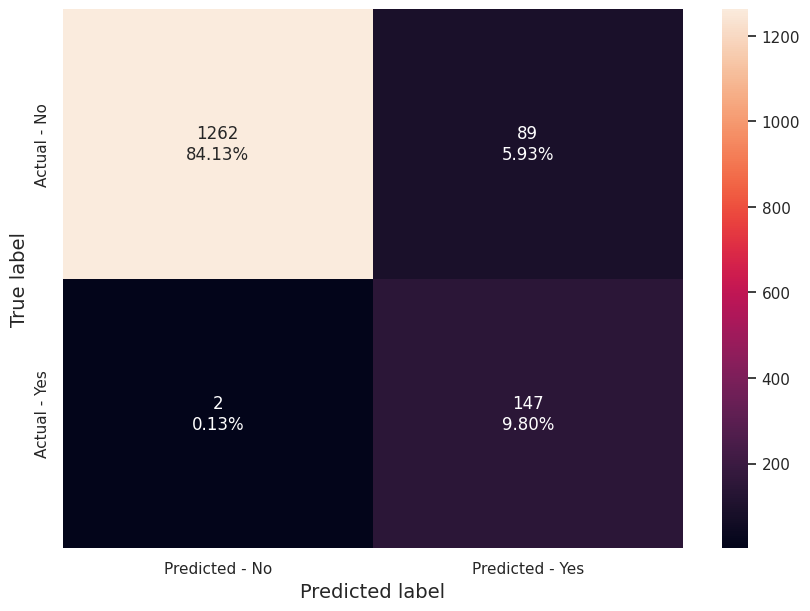

In [ ]:
make_confusion_matrix(best_model, y_test)

In [ ]:
get_recall_score(best_model)

Recall on training set :  0.9909365558912386
Recall on test set :  0.9865771812080537


**Visualizing the Decision Tree**

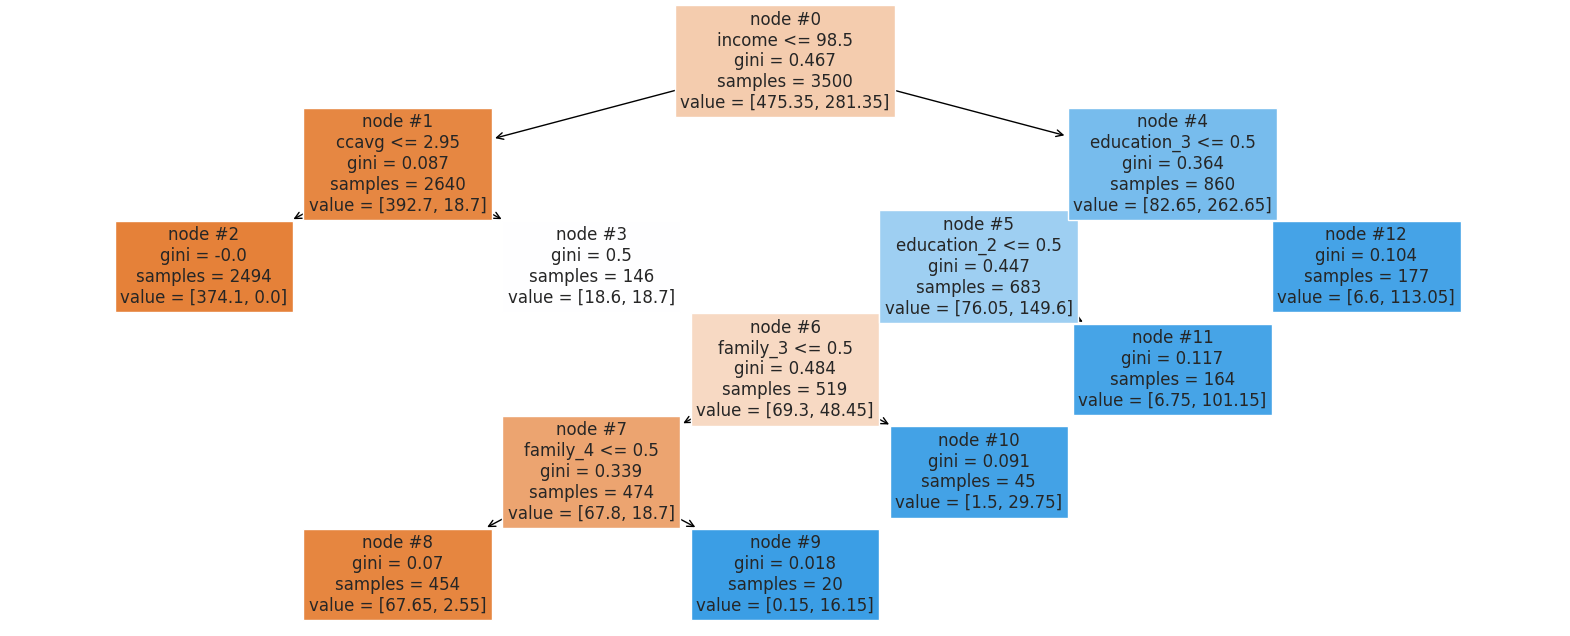

In [ ]:
plt.figure(figsize=(20, 8))

out = tree.plot_tree(best_model,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=12,
                     node_ids=True,
                     class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- income <= 98.50
|   |--- ccavg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- ccavg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- income >  98.50
|   |--- education_3 <= 0.50
|   |   |--- education_2 <= 0.50
|   |   |   |--- family_3 <= 0.50
|   |   |   |   |--- family_4 <= 0.50
|   |   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |   |--- family_4 >  0.50
|   |   |   |   |   |--- weights: [0.15, 16.15] class: 1
|   |   |   |--- family_3 >  0.50
|   |   |   |   |--- weights: [1.50, 29.75] class: 1
|   |   |--- education_2 >  0.50
|   |   |   |--- weights: [6.75, 101.15] class: 1
|   |--- education_3 >  0.50
|   |   |--- weights: [6.60, 113.05] class: 1



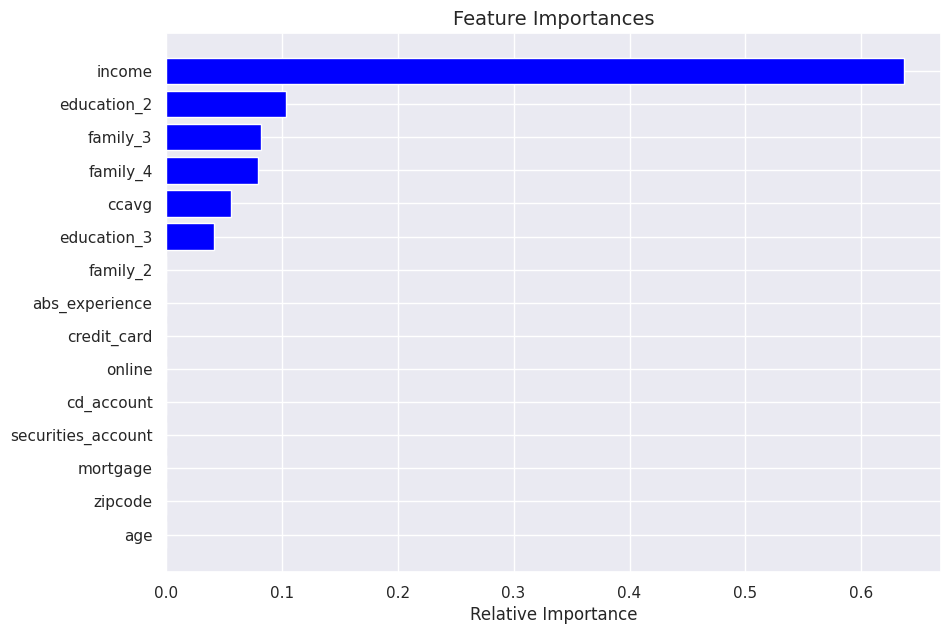

In [ ]:
importance_plot(model=best_model)

In [ ]:
best_model2 = DecisionTreeClassifier(ccp_alpha=0.01,
                                     class_weight={0: 0.15, 1: 0.85},
                                     random_state=1)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

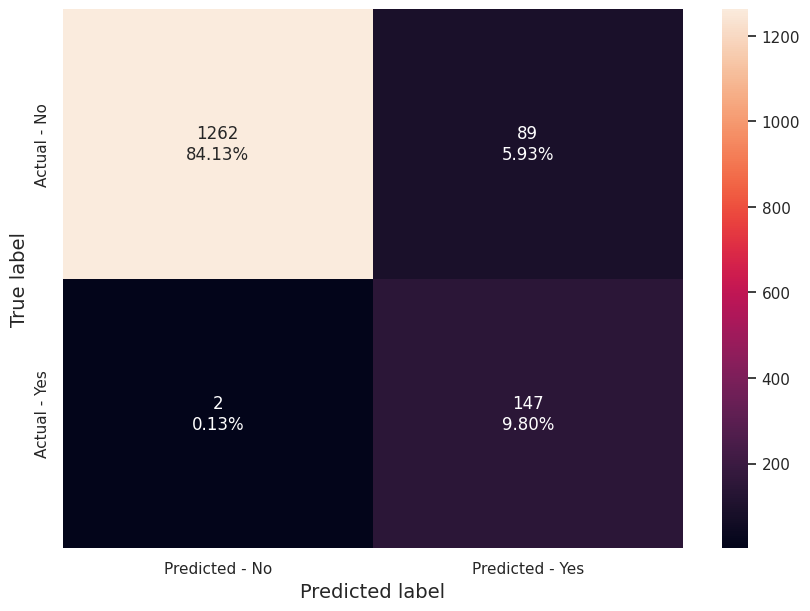

In [ ]:
make_confusion_matrix(best_model2, y_test)

In [ ]:
get_recall_score(best_model2)

Recall on training set :  0.9909365558912386
Recall on test set :  0.9865771812080537


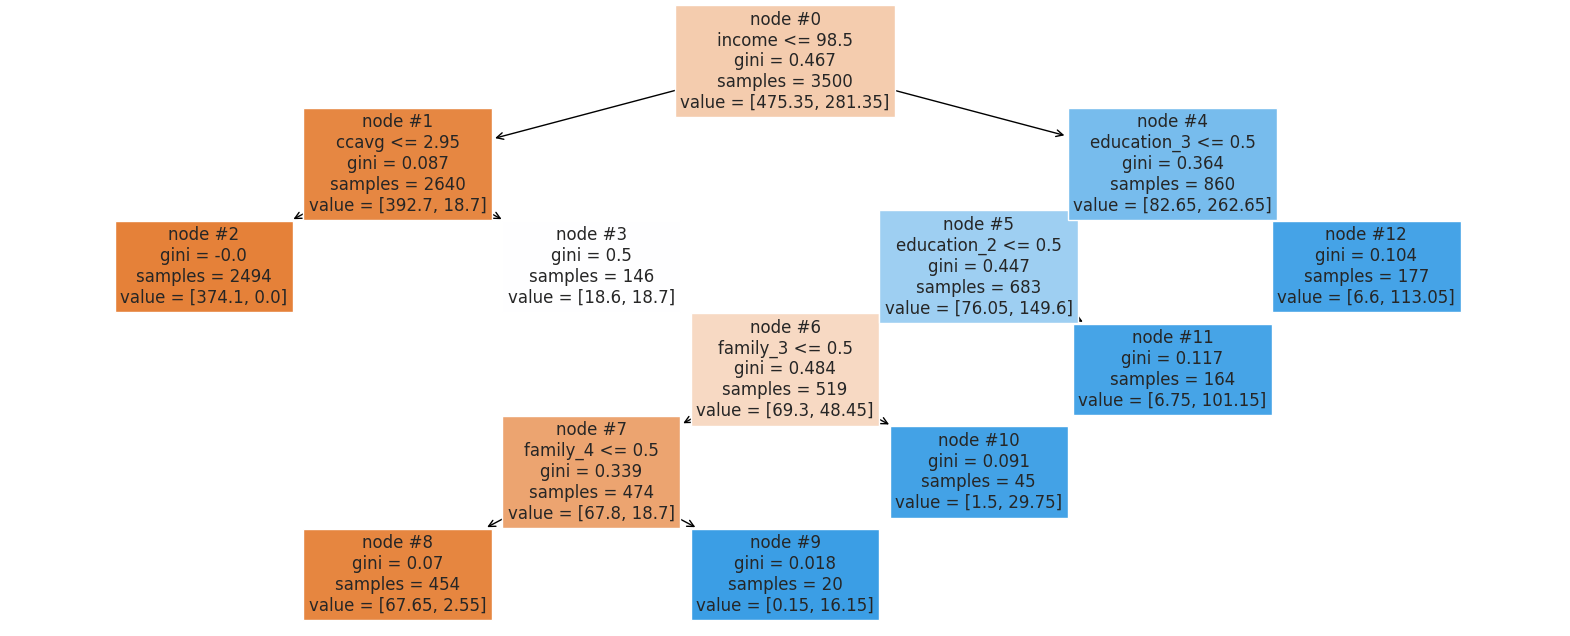

In [ ]:
plt.figure(figsize=(20, 8))

out = tree.plot_tree(best_model2,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=12,
                     node_ids=True,
                     class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- income <= 98.50
|   |--- ccavg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- ccavg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- income >  98.50
|   |--- education_3 <= 0.50
|   |   |--- education_2 <= 0.50
|   |   |   |--- family_3 <= 0.50
|   |   |   |   |--- family_4 <= 0.50
|   |   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |   |--- family_4 >  0.50
|   |   |   |   |   |--- weights: [0.15, 16.15] class: 1
|   |   |   |--- family_3 >  0.50
|   |   |   |   |--- weights: [1.50, 29.75] class: 1
|   |   |--- education_2 >  0.50
|   |   |   |--- weights: [6.75, 101.15] class: 1
|   |--- education_3 >  0.50
|   |   |--- weights: [6.60, 113.05] class: 1



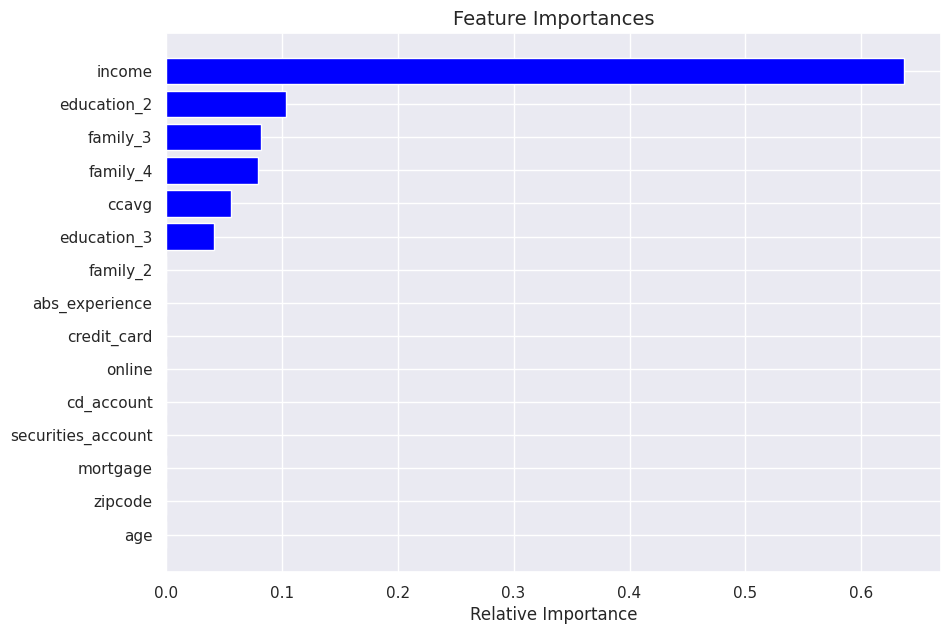

In [ ]:
importance_plot(model=best_model2)

## Model Comparison and Final Model Selection

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'],
                                 'Train_Recall':[1, 0.95, 0.99],
                                 'Test_Recall':[0.91, 0.91, 0.98]})
comparison_frame

Model  Train_Recall  Test_Recall
0                Initial decision tree model          1.00         0.91
1  Decision treee with hyperparameter tuning          0.95         0.91
2            Decision tree with post-pruning          0.99         0.98



---


**Decision tree model with post pruning has given the best recall score on data.**


---



## Actionable Insights and Business Recommendations


**Conclusion:**

1.   I analyzed the "Potential Loan marketing data" using different techniques and used a Decision Tree Classifier to build a predictive model. The predictive model helps predict whether a liability customer will buy a personal loan or not.
2.   Income, education, family, and credit card usage are the most important features in predicting potential loan customers.
3.   Those customers with separate securities and cd accounts are more likely to get a personal loan. Customers who use the bank's online facilities are more likely to get a personal loan versus those customers who don't use the online facilities.
4.   We established the importance of hyper-parameters/pruning to reduce overfitting during the model selection process.



**Recommendations:**


1.  Customer Profiles:

   *   **High Profile Customers** --> Higher income (98K USD +), Advanced/Graduate level education, 3/4 family members, high expenditure
   *   **Average Profile Customers** --> Medium income (39K - 98K USD), Graduate level education.2/3 family members, medium expenditure
   *   **Low Profile Customers** --> Lower income (< 39K USD), Undergraduates ,1/2 family Member, low expenditure

1.   From the decision tree model, income is the most important feature. If our customer's yearly income is less than 98.5K, there is a good chance the customer won't have a personal loan.
2.   From the model, those customers with an income greater than 98.5K and with an education level greater than or equal to 3 (Advanced/Professional) were most likely to have a personal loan.
       *   **Recommend to target customers that have incomes lower than 98K.**
3.   It was observed that those customers who use the online facilities were more likely to have personal loans.

       *   **Make the site more user-friendly and encourage those customers who don't use the facilities to use the online facilities.**
       *   **Make the application process to get personal loans easy with a better user experience.**














---

